# Facial Expression Detection using Convolutional Neural Networks 🤖📷

Facial expression detection is a fascinating field within computer vision that involves the recognition and interpretation of human emotions based on facial expressions. In this Jupyter Notebook, we'll build a Facial Expression Detection model using Convolutional Neural Networks (CNNs). This model will be trained to classify facial expressions into different emotion categories, such as happiness, sadness, anger, etc. 😊😢😠

### Goal 🚀💻
The primary goal of this project is to create an effective facial expression detection system that can be integrated into various applications, including human-computer interaction, virtual reality, and emotion-aware technology.

### Tools & Libraries 🛠️

We will be using the below tools and libriaries for our implementation
- TensorFlow: An open-source machine learning framework that includes tools for building and training deep learning models.
- Keras: A high-level neural network API that runs on top of TensorFlow, making it easier to build and experiment with deep learning models.
- Matplotlib: A visualisation library 📊🐍

## Implementation Steps
1. **Environment setup:** 
2. **Import necessary libraries:**
3. **Dataset collection:**
4. **Data Augmentation:**
5. **CNN model building:**
6. **Model training:**
7. **Model evaluation:**

Throughout the notebook, we'll provide detailed explanations, code snippets and visualizations to ensure a clear understanding of the entire process. 🧠🛠️

Let's get started! 🚀🚀🚀🚀

## Step 1: Environment setup
Ensure all necessary libraries are installed. Installation can be achieved using the below command

In [1]:
# Use the pip to install the necessary libraries
# !pip install tensorflow
# !pip install numpy
# !pip install matplotlib
# !pip install opencv-python


# The below code snippet is used to check the versions of the libraries
import tensorflow as tf
import numpy as np
import matplotlib
import cv2

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)





TensorFlow version: 2.15.0
NumPy version: 1.24.3
Matplotlib version: 3.7.2
OpenCV version: 4.9.0


## Step 2: Import necessary libraries

Import all required libraries in this section of your notebook. It is always good practice to keep your code tidy and well structured.

In [2]:
# operating system libraries
import os
import random

# Open Computer vision libraries
import cv2 as cv

# File operation libraries
import shutil
import yaml

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# visualization libraries
import matplotlib.pyplot as plt

## Step 3: Dataset collection

For the purpose this exercise, we will use facial expression dataset named **[AffectNeT](https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format/download?datasetVersionNumber=2)** from Kaggle. 
The **[AffectNeT](https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format/download?datasetVersionNumber=2)** dataset is intended for use in YOLO projects involving facial expression recognition.

According to the instructions on the Kaggle website, the entire data set is separated into train-test-validation folders with modified image names and matching txt files with annotations. All images are exactly 96 x 96 pixels.

The dataset is shuffled and divided into three parts:

- train (0.7)
- validation (0.2)
- test (0.1)


There are 8 emotion classes which are mapped as:
- 0- Anger
- 1- Contempt
- 2- Disgust
- 3- Fear
- 4- Happy
- 5- Neutral
- 6- Sad
- 7- Surprise

In [3]:
# Define dataset directory
dataset_dir = "dataset/YOLO_format"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(dataset_dir, "train", "images")
valid_image_dir = os.path.join(dataset_dir, "valid", "images")
test_image_dir = os.path.join(dataset_dir, "test", "images")

# Define label subdirectories for test, train, validation sets
train_label_dir = os.path.join(dataset_dir, "train", "labels")
valid_label_dir = os.path.join(dataset_dir, "valid", "labels")
test_label_dir = os.path.join(dataset_dir, "test", "labels")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
valid_images = os.listdir(valid_image_dir)
test_images = os.listdir(test_image_dir)


In [4]:
# Create a function to display some sample images from each directory
def display_images(directory, images):
    plt.figure(figsize=(8, 8))
    
    # Display 9 random images
    random_images = random.sample(images, 9)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(directory, random_images[i])
        
        # Read image using cv.imread
        img = cv.imread(img_path)
        
        # OpenCV loads images in BGR, thus we need to convert to RGB
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        # Plot image using matplotlib
        plt.imshow(img)
        plt.axis('off')
        plt.title(images[i])
        

### Image Display

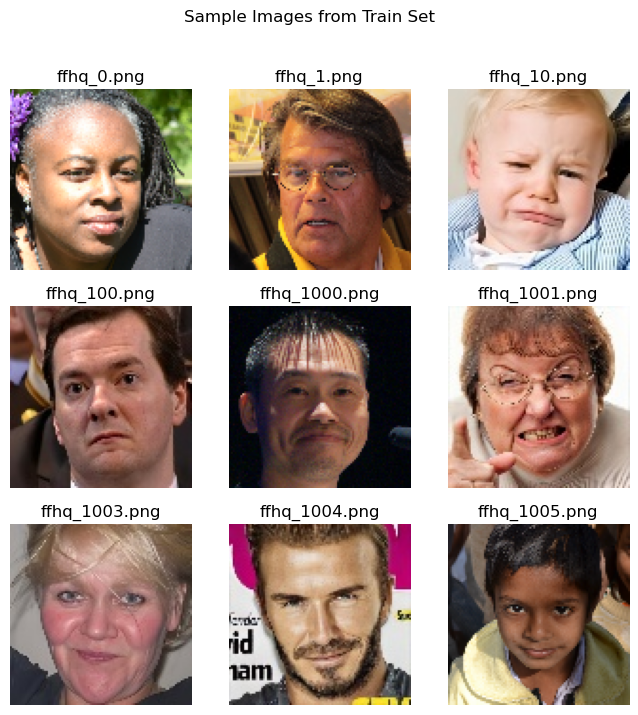

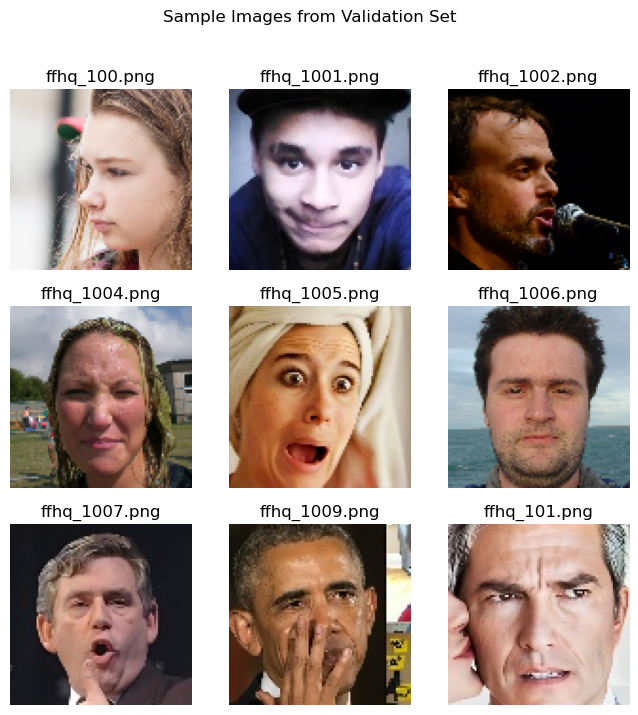

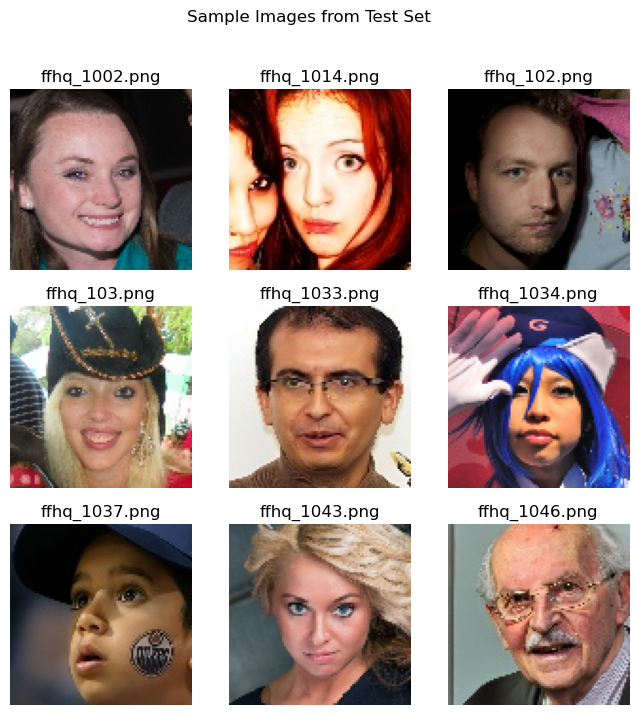

In [5]:
# Display train set images
display_images(train_image_dir, train_images)
plt.suptitle('Sample Images from Train Set')
plt.show()

# Display validation set images
display_images(valid_image_dir, valid_images)
plt.suptitle('Sample Images from Validation Set')
plt.show()

# Display Test set images
display_images(test_image_dir, test_images)
plt.suptitle('Sample Images from Test Set')
plt.show()



### 3.1 Organize YOLO_format dataset into their respective classes


In [6]:
# Lets define label mapping
labels_map = {
    0 : 'Anger',
    1 : 'Contempt',
    2 : 'Disgust',
    3 : 'Fear',
    4 : 'Happy',
    5 : 'Neutral',
    6 : 'Sad',
    7 : 'Suprise'
}

In [7]:
# Lets create a couple of functions to carry out this activity.
     
def organize_images_by_class(image_dir, output_dir, label_path):
    # Create output directory for various classes
    os.makedirs(output_dir, exist_ok=True)

    images = os.listdir(image_dir)
    for image in images:
        image_path = os.path.join(image_dir, image)

        # Extract class label from the label file content
        label_file_path = os.path.join(label_path, os.path.splitext(image)[0] + '.txt')
        if not os.path.exists(label_file_path):
            # Skip if the label file is missing
            print(f"Warning: Label file not found for image {image}")
            continue

        with open(label_file_path, 'r') as label_file:
            class_label = int(label_file.readline().split()[0])

        # Map class label to class name
        class_name = labels_map.get(class_label, f'Unknown_Class_{class_label}')

        # Create class subdirectory if not exists
        class_path = os.path.join(output_dir, class_name)
        os.makedirs(class_path, exist_ok=True)

        # Copy image to the class subdirectory
        shutil.copy(image_path, os.path.join(class_path, image))
        print(f"Organized {image} to {class_name}")

def create_image_datasets(data_path, output_path, label_path):
    # Define paths for train, validation, and test sets
    train_images_dir = os.path.join(data_path, 'train/images')
    train_labels_dir = os.path.join(data_path, 'train/labels')
    train_output_dir = os.path.join(output_path, 'train')

    valid_images_dir = os.path.join(data_path, 'valid/images')
    valid_labels_dir = os.path.join(data_path, 'valid/labels')
    valid_output_dir = os.path.join(output_path, 'valid')

    test_images_dir = os.path.join(data_path, 'test/images')
    test_labels_dir = os.path.join(data_path, 'test/labels')
    test_output_dir = os.path.join(output_path, 'test')

    # Organize images for train set
    organize_images_by_class(train_images_dir, train_output_dir, train_labels_dir)

    # Organize images for validation set
    organize_images_by_class(valid_images_dir, valid_output_dir, valid_labels_dir)

    # Organize images for test set
    organize_images_by_class(test_images_dir, test_output_dir, test_labels_dir)

### Organize YOLO datasets

In [8]:
# Define paths
data_path = "dataset/YOLO_format/"
output_path = "dataset/image_dataset/"
label_path = "dataset/YOLO_format/"

create_image_datasets(data_path, output_path, label_path)

Organized ffhq_0.png to Happy
Organized ffhq_1.png to Happy
Organized ffhq_10.png to Disgust
Organized ffhq_100.png to Suprise
Organized ffhq_1000.png to Contempt
Organized ffhq_1001.png to Happy
Organized ffhq_1003.png to Happy
Organized ffhq_1004.png to Neutral
Organized ffhq_1005.png to Anger
Organized ffhq_1007.png to Happy
Organized ffhq_1008.png to Neutral
Organized ffhq_1009.png to Contempt
Organized ffhq_101.png to Suprise
Organized ffhq_1010.png to Happy
Organized ffhq_1011.png to Happy
Organized ffhq_1012.png to Neutral
Organized ffhq_1013.png to Neutral
Organized ffhq_1015.png to Happy
Organized ffhq_1016.png to Disgust
Organized ffhq_1017.png to Happy
Organized ffhq_1018.png to Happy
Organized ffhq_1019.png to Sad
Organized ffhq_102.png to Suprise
Organized ffhq_1020.png to Neutral
Organized ffhq_1021.png to Happy
Organized ffhq_1022.png to Contempt
Organized ffhq_1023.png to Happy
Organized ffhq_1024.png to Happy
Organized ffhq_1025.png to Happy
Organized ffhq_1026.png to 

Organized ffhq_1407.png to Disgust
Organized ffhq_1408.png to Disgust
Organized ffhq_141.png to Happy
Organized ffhq_1410.png to Happy
Organized ffhq_1411.png to Contempt
Organized ffhq_1412.png to Happy
Organized ffhq_1413.png to Happy
Organized ffhq_1414.png to Neutral
Organized ffhq_1415.png to Happy
Organized ffhq_1416.png to Neutral
Organized ffhq_1417.png to Neutral
Organized ffhq_1418.png to Happy
Organized ffhq_1419.png to Neutral
Organized ffhq_142.png to Suprise
Organized ffhq_1420.png to Contempt
Organized ffhq_1421.png to Happy
Organized ffhq_1423.png to Anger
Organized ffhq_1424.png to Contempt
Organized ffhq_1425.png to Neutral
Organized ffhq_1426.png to Contempt
Organized ffhq_1427.png to Happy
Organized ffhq_1429.png to Suprise
Organized ffhq_143.png to Suprise
Organized ffhq_1430.png to Neutral
Organized ffhq_1431.png to Happy
Organized ffhq_1433.png to Suprise
Organized ffhq_1434.png to Disgust
Organized ffhq_1435.png to Disgust
Organized ffhq_1436.png to Contempt
Org

Organized ffhq_1867.png to Neutral
Organized ffhq_1868.png to Happy
Organized ffhq_1869.png to Anger
Organized ffhq_187.png to Neutral
Organized ffhq_1870.png to Neutral
Organized ffhq_1871.png to Happy
Organized ffhq_1872.png to Suprise
Organized ffhq_1875.png to Happy
Organized ffhq_1876.png to Neutral
Organized ffhq_1877.png to Neutral
Organized ffhq_1878.png to Neutral
Organized ffhq_188.png to Fear
Organized ffhq_1880.png to Anger
Organized ffhq_1881.png to Disgust
Organized ffhq_1882.png to Disgust
Organized ffhq_1883.png to Happy
Organized ffhq_1884.png to Neutral
Organized ffhq_1885.png to Happy
Organized ffhq_1886.png to Sad
Organized ffhq_1887.png to Happy
Organized ffhq_1888.png to Neutral
Organized ffhq_1890.png to Happy
Organized ffhq_1891.png to Disgust
Organized ffhq_1892.png to Sad
Organized ffhq_1894.png to Suprise
Organized ffhq_1896.png to Happy
Organized ffhq_1897.png to Suprise
Organized ffhq_1898.png to Suprise
Organized ffhq_1899.png to Suprise
Organized ffhq_19.

Organized ffhq_2166.png to Sad
Organized ffhq_2167.png to Happy
Organized ffhq_2168.png to Happy
Organized ffhq_2169.png to Happy
Organized ffhq_217.png to Happy
Organized ffhq_2172.png to Contempt
Organized ffhq_2173.png to Contempt
Organized ffhq_2174.png to Happy
Organized ffhq_2175.png to Happy
Organized ffhq_2176.png to Suprise
Organized ffhq_2177.png to Anger
Organized ffhq_2178.png to Neutral
Organized ffhq_2179.png to Sad
Organized ffhq_218.png to Contempt
Organized ffhq_2180.png to Happy
Organized ffhq_2181.png to Disgust
Organized ffhq_2182.png to Suprise
Organized ffhq_2183.png to Happy
Organized ffhq_2184.png to Happy
Organized ffhq_2185.png to Sad
Organized ffhq_2186.png to Neutral
Organized ffhq_2189.png to Happy
Organized ffhq_219.png to Disgust
Organized ffhq_2190.png to Suprise
Organized ffhq_2192.png to Contempt
Organized ffhq_2193.png to Suprise
Organized ffhq_2194.png to Happy
Organized ffhq_2195.png to Happy
Organized ffhq_2196.png to Happy
Organized ffhq_2197.png 

Organized ffhq_2466.png to Contempt
Organized ffhq_2467.png to Happy
Organized ffhq_2468.png to Contempt
Organized ffhq_2469.png to Neutral
Organized ffhq_247.png to Contempt
Organized ffhq_2470.png to Contempt
Organized ffhq_2471.png to Suprise
Organized ffhq_2473.png to Anger
Organized ffhq_2475.png to Happy
Organized ffhq_2476.png to Happy
Organized ffhq_2477.png to Happy
Organized ffhq_2478.png to Neutral
Organized ffhq_2479.png to Happy
Organized ffhq_248.png to Happy
Organized ffhq_2480.png to Happy
Organized ffhq_2481.png to Contempt
Organized ffhq_2482.png to Neutral
Organized ffhq_2483.png to Happy
Organized ffhq_2484.png to Happy
Organized ffhq_2485.png to Neutral
Organized ffhq_2487.png to Happy
Organized ffhq_2488.png to Disgust
Organized ffhq_2489.png to Sad
Organized ffhq_249.png to Neutral
Organized ffhq_2490.png to Happy
Organized ffhq_2491.png to Suprise
Organized ffhq_2492.png to Suprise
Organized ffhq_2493.png to Sad
Organized ffhq_2494.png to Fear
Organized ffhq_249

Organized ffhq_2732.png to Happy
Organized ffhq_2733.png to Happy
Organized ffhq_2734.png to Sad
Organized ffhq_2735.png to Happy
Organized ffhq_2736.png to Neutral
Organized ffhq_2737.png to Happy
Organized ffhq_2738.png to Neutral
Organized ffhq_2739.png to Happy
Organized ffhq_274.png to Happy
Organized ffhq_2741.png to Contempt
Organized ffhq_2742.png to Neutral
Organized ffhq_2743.png to Happy
Organized ffhq_2744.png to Happy
Organized ffhq_2745.png to Disgust
Organized ffhq_2746.png to Happy
Organized ffhq_2747.png to Neutral
Organized ffhq_2748.png to Contempt
Organized ffhq_2749.png to Disgust
Organized ffhq_275.png to Suprise
Organized ffhq_2750.png to Happy
Organized ffhq_2751.png to Happy
Organized ffhq_2752.png to Happy
Organized ffhq_2753.png to Neutral
Organized ffhq_2754.png to Happy
Organized ffhq_2755.png to Neutral
Organized ffhq_2756.png to Happy
Organized ffhq_2757.png to Happy
Organized ffhq_2758.png to Contempt
Organized ffhq_2759.png to Happy
Organized ffhq_276.p

Organized ffhq_3033.png to Neutral
Organized ffhq_3034.png to Happy
Organized ffhq_3035.png to Suprise
Organized ffhq_3036.png to Disgust
Organized ffhq_3037.png to Happy
Organized ffhq_3038.png to Neutral
Organized ffhq_3039.png to Suprise
Organized ffhq_304.png to Happy
Organized ffhq_3040.png to Neutral
Organized ffhq_3041.png to Disgust
Organized ffhq_3042.png to Anger
Organized ffhq_3043.png to Happy
Organized ffhq_3044.png to Happy
Organized ffhq_3045.png to Disgust
Organized ffhq_3046.png to Happy
Organized ffhq_3047.png to Disgust
Organized ffhq_3048.png to Happy
Organized ffhq_3049.png to Happy
Organized ffhq_305.png to Suprise
Organized ffhq_3051.png to Sad
Organized ffhq_3052.png to Suprise
Organized ffhq_3053.png to Contempt
Organized ffhq_3054.png to Happy
Organized ffhq_3055.png to Happy
Organized ffhq_3056.png to Contempt
Organized ffhq_3057.png to Neutral
Organized ffhq_3058.png to Happy
Organized ffhq_3059.png to Happy
Organized ffhq_306.png to Sad
Organized ffhq_3060.

Organized ffhq_3375.png to Happy
Organized ffhq_3379.png to Happy
Organized ffhq_338.png to Anger
Organized ffhq_3381.png to Happy
Organized ffhq_3383.png to Happy
Organized ffhq_3384.png to Happy
Organized ffhq_3385.png to Happy
Organized ffhq_3388.png to Disgust
Organized ffhq_3389.png to Happy
Organized ffhq_339.png to Suprise
Organized ffhq_3391.png to Happy
Organized ffhq_3392.png to Happy
Organized ffhq_3396.png to Happy
Organized ffhq_3397.png to Happy
Organized ffhq_3398.png to Happy
Organized ffhq_3399.png to Happy
Organized ffhq_34.png to Neutral
Organized ffhq_340.png to Neutral
Organized ffhq_3401.png to Contempt
Organized ffhq_3402.png to Contempt
Organized ffhq_3403.png to Contempt
Organized ffhq_3404.png to Happy
Organized ffhq_3405.png to Happy
Organized ffhq_3406.png to Contempt
Organized ffhq_3407.png to Happy
Organized ffhq_3408.png to Happy
Organized ffhq_3409.png to Happy
Organized ffhq_341.png to Suprise
Organized ffhq_3411.png to Happy
Organized ffhq_3412.png to 

Organized ffhq_3742.png to Anger
Organized ffhq_3743.png to Happy
Organized ffhq_3745.png to Happy
Organized ffhq_3746.png to Neutral
Organized ffhq_3747.png to Disgust
Organized ffhq_3748.png to Neutral
Organized ffhq_3749.png to Anger
Organized ffhq_375.png to Suprise
Organized ffhq_3750.png to Happy
Organized ffhq_3751.png to Anger
Organized ffhq_3752.png to Suprise
Organized ffhq_3753.png to Happy
Organized ffhq_3754.png to Happy
Organized ffhq_3756.png to Happy
Organized ffhq_3757.png to Contempt
Organized ffhq_3759.png to Contempt
Organized ffhq_376.png to Anger
Organized ffhq_3760.png to Contempt
Organized ffhq_3761.png to Contempt
Organized ffhq_3762.png to Happy
Organized ffhq_3763.png to Neutral
Organized ffhq_3764.png to Disgust
Organized ffhq_3765.png to Contempt
Organized ffhq_3766.png to Neutral
Organized ffhq_3767.png to Happy
Organized ffhq_3768.png to Suprise
Organized ffhq_3769.png to Contempt
Organized ffhq_377.png to Contempt
Organized ffhq_3770.png to Neutral
Organ

Organized ffhq_4052.png to Happy
Organized ffhq_4053.png to Fear
Organized ffhq_4054.png to Disgust
Organized ffhq_4055.png to Happy
Organized ffhq_4056.png to Sad
Organized ffhq_4057.png to Happy
Organized ffhq_4058.png to Happy
Organized ffhq_4059.png to Happy
Organized ffhq_406.png to Suprise
Organized ffhq_4060.png to Neutral
Organized ffhq_4061.png to Sad
Organized ffhq_4062.png to Suprise
Organized ffhq_4063.png to Disgust
Organized ffhq_4064.png to Neutral
Organized ffhq_4065.png to Happy
Organized ffhq_4066.png to Sad
Organized ffhq_4067.png to Happy
Organized ffhq_4068.png to Contempt
Organized ffhq_4069.png to Happy
Organized ffhq_4070.png to Happy
Organized ffhq_4071.png to Happy
Organized ffhq_4072.png to Happy
Organized ffhq_4073.png to Sad
Organized ffhq_4074.png to Happy
Organized ffhq_4075.png to Contempt
Organized ffhq_4076.png to Sad
Organized ffhq_4077.png to Happy
Organized ffhq_4078.png to Disgust
Organized ffhq_4079.png to Neutral
Organized ffhq_408.png to Happy
O

Organized ffhq_435.png to Happy
Organized ffhq_4350.png to Neutral
Organized ffhq_4352.png to Happy
Organized ffhq_4353.png to Happy
Organized ffhq_4354.png to Happy
Organized ffhq_4355.png to Fear
Organized ffhq_4356.png to Happy
Organized ffhq_4357.png to Disgust
Organized ffhq_4358.png to Happy
Organized ffhq_4359.png to Neutral
Organized ffhq_436.png to Disgust
Organized ffhq_4361.png to Neutral
Organized ffhq_4362.png to Happy
Organized ffhq_4363.png to Neutral
Organized ffhq_4364.png to Happy
Organized ffhq_4365.png to Neutral
Organized ffhq_4366.png to Neutral
Organized ffhq_4367.png to Happy
Organized ffhq_4368.png to Happy
Organized ffhq_4369.png to Contempt
Organized ffhq_437.png to Suprise
Organized ffhq_4370.png to Fear
Organized ffhq_4371.png to Suprise
Organized ffhq_4372.png to Contempt
Organized ffhq_4373.png to Contempt
Organized ffhq_4374.png to Happy
Organized ffhq_4375.png to Happy
Organized ffhq_4376.png to Contempt
Organized ffhq_4377.png to Neutral
Organized ffhq

Organized ffhq_4652.png to Happy
Organized ffhq_4653.png to Happy
Organized ffhq_4654.png to Happy
Organized ffhq_4655.png to Anger
Organized ffhq_4656.png to Contempt
Organized ffhq_4658.png to Anger
Organized ffhq_466.png to Happy
Organized ffhq_4660.png to Sad
Organized ffhq_4661.png to Neutral
Organized ffhq_4662.png to Disgust
Organized ffhq_4663.png to Neutral
Organized ffhq_4664.png to Happy
Organized ffhq_4665.png to Neutral
Organized ffhq_4666.png to Disgust
Organized ffhq_4667.png to Neutral
Organized ffhq_4668.png to Happy
Organized ffhq_467.png to Suprise
Organized ffhq_4670.png to Sad
Organized ffhq_4671.png to Happy
Organized ffhq_4672.png to Happy
Organized ffhq_4673.png to Sad
Organized ffhq_4674.png to Happy
Organized ffhq_4675.png to Disgust
Organized ffhq_4676.png to Fear
Organized ffhq_4677.png to Contempt
Organized ffhq_4678.png to Contempt
Organized ffhq_4679.png to Contempt
Organized ffhq_468.png to Neutral
Organized ffhq_4680.png to Sad
Organized ffhq_4681.png t

Organized ffhq_4969.png to Suprise
Organized ffhq_497.png to Happy
Organized ffhq_4970.png to Happy
Organized ffhq_4971.png to Happy
Organized ffhq_4972.png to Anger
Organized ffhq_4973.png to Happy
Organized ffhq_4974.png to Disgust
Organized ffhq_4975.png to Neutral
Organized ffhq_4976.png to Disgust
Organized ffhq_4977.png to Disgust
Organized ffhq_4978.png to Anger
Organized ffhq_4979.png to Happy
Organized ffhq_498.png to Fear
Organized ffhq_4980.png to Anger
Organized ffhq_4981.png to Happy
Organized ffhq_4982.png to Neutral
Organized ffhq_4983.png to Happy
Organized ffhq_4984.png to Happy
Organized ffhq_4985.png to Happy
Organized ffhq_4986.png to Contempt
Organized ffhq_4987.png to Happy
Organized ffhq_4988.png to Anger
Organized ffhq_4989.png to Happy
Organized ffhq_4990.png to Sad
Organized ffhq_4991.png to Contempt
Organized ffhq_4993.png to Suprise
Organized ffhq_4994.png to Contempt
Organized ffhq_4995.png to Suprise
Organized ffhq_4996.png to Suprise
Organized ffhq_4998.p

Organized ffhq_5311.png to Suprise
Organized ffhq_5312.png to Neutral
Organized ffhq_5313.png to Neutral
Organized ffhq_5314.png to Sad
Organized ffhq_5315.png to Neutral
Organized ffhq_5317.png to Suprise
Organized ffhq_5318.png to Contempt
Organized ffhq_532.png to Suprise
Organized ffhq_5320.png to Neutral
Organized ffhq_5322.png to Neutral
Organized ffhq_5323.png to Suprise
Organized ffhq_5325.png to Anger
Organized ffhq_5326.png to Suprise
Organized ffhq_5329.png to Contempt
Organized ffhq_533.png to Neutral
Organized ffhq_5330.png to Contempt
Organized ffhq_5332.png to Neutral
Organized ffhq_5334.png to Contempt
Organized ffhq_5335.png to Neutral
Organized ffhq_5336.png to Sad
Organized ffhq_5337.png to Neutral
Organized ffhq_5338.png to Neutral
Organized ffhq_5339.png to Suprise
Organized ffhq_534.png to Sad
Organized ffhq_5340.png to Contempt
Organized ffhq_5341.png to Anger
Organized ffhq_5342.png to Contempt
Organized ffhq_5344.png to Neutral
Organized ffhq_5346.png to Neutra

Organized ffhq_587.png to Suprise
Organized ffhq_588.png to Fear
Organized ffhq_589.png to Fear
Organized ffhq_59.png to Happy
Organized ffhq_590.png to Happy
Organized ffhq_591.png to Happy
Organized ffhq_592.png to Neutral
Organized ffhq_593.png to Disgust
Organized ffhq_594.png to Suprise
Organized ffhq_595.png to Happy
Organized ffhq_596.png to Happy
Organized ffhq_597.png to Suprise
Organized ffhq_598.png to Neutral
Organized ffhq_599.png to Happy
Organized ffhq_6.png to Disgust
Organized ffhq_60.png to Neutral
Organized ffhq_600.png to Happy
Organized ffhq_601.png to Anger
Organized ffhq_602.png to Neutral
Organized ffhq_604.png to Happy
Organized ffhq_605.png to Happy
Organized ffhq_606.png to Happy
Organized ffhq_607.png to Happy
Organized ffhq_608.png to Neutral
Organized ffhq_609.png to Suprise
Organized ffhq_61.png to Contempt
Organized ffhq_610.png to Happy
Organized ffhq_611.png to Suprise
Organized ffhq_612.png to Contempt
Organized ffhq_613.png to Happy
Organized ffhq_61

Organized ffhq_867.png to Sad
Organized ffhq_868.png to Happy
Organized ffhq_87.png to Happy
Organized ffhq_870.png to Anger
Organized ffhq_871.png to Sad
Organized ffhq_872.png to Suprise
Organized ffhq_873.png to Sad
Organized ffhq_874.png to Happy
Organized ffhq_875.png to Contempt
Organized ffhq_876.png to Happy
Organized ffhq_879.png to Anger
Organized ffhq_88.png to Suprise
Organized ffhq_880.png to Neutral
Organized ffhq_881.png to Happy
Organized ffhq_882.png to Neutral
Organized ffhq_883.png to Happy
Organized ffhq_884.png to Anger
Organized ffhq_885.png to Neutral
Organized ffhq_886.png to Neutral
Organized ffhq_887.png to Anger
Organized ffhq_889.png to Neutral
Organized ffhq_89.png to Sad
Organized ffhq_890.png to Contempt
Organized ffhq_891.png to Happy
Organized ffhq_893.png to Suprise
Organized ffhq_894.png to Neutral
Organized ffhq_895.png to Happy
Organized ffhq_896.png to Sad
Organized ffhq_897.png to Happy
Organized ffhq_898.png to Happy
Organized ffhq_9.png to Conte

Organized image0001453.jpg to Neutral
Organized image0001454.jpg to Suprise
Organized image0001458.jpg to Fear
Organized image0001470.jpg to Anger
Organized image0001502.jpg to Sad
Organized image0001516.jpg to Anger
Organized image0001520.jpg to Suprise
Organized image0001526.jpg to Suprise
Organized image0001538.jpg to Anger
Organized image0001555.jpg to Anger
Organized image0001559.jpg to Sad
Organized image0001561.jpg to Disgust
Organized image0001568.jpg to Anger
Organized image0001574.jpg to Contempt
Organized image0001582.jpg to Suprise
Organized image0001600.jpg to Anger
Organized image0001602.jpg to Sad
Organized image0001610.jpg to Neutral
Organized image0001615.jpg to Disgust
Organized image0001623.jpg to Anger
Organized image0001629.jpg to Fear
Organized image0001640.jpg to Suprise
Organized image0001644.jpg to Fear
Organized image0001651.jpg to Fear
Organized image0001659.jpg to Neutral
Organized image0001671.jpg to Anger
Organized image0001685.jpg to Fear
Organized image0

Organized image0004099.jpg to Disgust
Organized image0004101.jpg to Sad
Organized image0004115.jpg to Sad
Organized image0004119.jpg to Suprise
Organized image0004133.jpg to Anger
Organized image0004137.jpg to Suprise
Organized image0004138.jpg to Sad
Organized image0004164.jpg to Anger
Organized image0004182.jpg to Sad
Organized image0004187.jpg to Fear
Organized image0004195.jpg to Disgust
Organized image0004201.jpg to Contempt
Organized image0004213.jpg to Anger
Organized image0004224.jpg to Suprise
Organized image0004230.jpg to Suprise
Organized image0004251.jpg to Anger
Organized image0004284.jpg to Anger
Organized image0004289.jpg to Sad
Organized image0004293.jpg to Fear
Organized image0004297.jpg to Anger
Organized image0004330.jpg to Neutral
Organized image0004357.jpg to Anger
Organized image0004358.jpg to Contempt
Organized image0004362.jpg to Disgust
Organized image0004381.jpg to Neutral
Organized image0004411.jpg to Neutral
Organized image0004419.jpg to Happy
Organized imag

Organized image0006874.jpg to Anger
Organized image0006880.jpg to Disgust
Organized image0006881.jpg to Fear
Organized image0006883.jpg to Sad
Organized image0006890.jpg to Suprise
Organized image0006895.jpg to Fear
Organized image0006897.jpg to Sad
Organized image0006900.jpg to Anger
Organized image0006901.jpg to Suprise
Organized image0006914.jpg to Disgust
Organized image0006915.jpg to Suprise
Organized image0006923.jpg to Contempt
Organized image0006927.jpg to Anger
Organized image0006953.jpg to Fear
Organized image0006955.jpg to Disgust
Organized image0006963.jpg to Sad
Organized image0006971.jpg to Anger
Organized image0006982.jpg to Anger
Organized image0006991.jpg to Disgust
Organized image0006992.jpg to Contempt
Organized image0006995.jpg to Anger
Organized image0006998.jpg to Suprise
Organized image0007029.jpg to Anger
Organized image0007062.jpg to Neutral
Organized image0007074.jpg to Sad
Organized image0007081.jpg to Suprise
Organized image0007085.jpg to Disgust
Organized i

Organized image0009856.jpg to Sad
Organized image0009867.jpg to Anger
Organized image0009873.jpg to Disgust
Organized image0009907.jpg to Sad
Organized image0009909.jpg to Fear
Organized image0009932.jpg to Sad
Organized image0009938.jpg to Sad
Organized image0009939.jpg to Anger
Organized image0009942.jpg to Anger
Organized image0009950.jpg to Anger
Organized image0009974.jpg to Fear
Organized image0009992.jpg to Suprise
Organized image0010009.jpg to Neutral
Organized image0010019.jpg to Suprise
Organized image0010074.jpg to Suprise
Organized image0010075.jpg to Fear
Organized image0010092.jpg to Disgust
Organized image0010110.jpg to Disgust
Organized image0010113.jpg to Disgust
Organized image0010115.jpg to Fear
Organized image0010116.jpg to Suprise
Organized image0010125.jpg to Anger
Organized image0010130.jpg to Anger
Organized image0010135.jpg to Anger
Organized image0010138.jpg to Sad
Organized image0010142.jpg to Anger
Organized image0010148.jpg to Fear
Organized image0010166.jp

Organized image0012396.jpg to Sad
Organized image0012402.jpg to Sad
Organized image0012405.jpg to Sad
Organized image0012406.jpg to Anger
Organized image0012408.jpg to Anger
Organized image0012419.jpg to Suprise
Organized image0012425.jpg to Suprise
Organized image0012430.jpg to Contempt
Organized image0012437.jpg to Disgust
Organized image0012443.jpg to Anger
Organized image0012445.jpg to Anger
Organized image0012446.jpg to Sad
Organized image0012453.jpg to Anger
Organized image0012455.jpg to Disgust
Organized image0012456.jpg to Anger
Organized image0012459.jpg to Sad
Organized image0012464.jpg to Anger
Organized image0012467.jpg to Sad
Organized image0012471.jpg to Suprise
Organized image0012472.jpg to Contempt
Organized image0012478.jpg to Fear
Organized image0012479.jpg to Fear
Organized image0012488.jpg to Fear
Organized image0012493.jpg to Suprise
Organized image0012494.jpg to Suprise
Organized image0012498.jpg to Neutral
Organized image0012500.jpg to Suprise
Organized image0012

Organized image0013882.jpg to Suprise
Organized image0013888.jpg to Anger
Organized image0013889.jpg to Contempt
Organized image0013895.jpg to Suprise
Organized image0013898.jpg to Suprise
Organized image0013904.jpg to Suprise
Organized image0013909.jpg to Suprise
Organized image0013919.jpg to Neutral
Organized image0013932.jpg to Suprise
Organized image0013959.jpg to Sad
Organized image0013968.jpg to Fear
Organized image0013975.jpg to Happy
Organized image0013977.jpg to Sad
Organized image0013978.jpg to Sad
Organized image0013979.jpg to Sad
Organized image0013984.jpg to Sad
Organized image0013985.jpg to Sad
Organized image0013986.jpg to Anger
Organized image0013989.jpg to Suprise
Organized image0013998.jpg to Anger
Organized image0014002.jpg to Sad
Organized image0014009.jpg to Anger
Organized image0014011.jpg to Anger
Organized image0014032.jpg to Contempt
Organized image0014033.jpg to Anger
Organized image0014035.jpg to Anger
Organized image0014041.jpg to Anger
Organized image001404

Organized image0015303.jpg to Sad
Organized image0015311.jpg to Suprise
Organized image0015313.jpg to Disgust
Organized image0015317.jpg to Sad
Organized image0015322.jpg to Sad
Organized image0015324.jpg to Fear
Organized image0015333.jpg to Suprise
Organized image0015335.jpg to Suprise
Organized image0015356.jpg to Sad
Organized image0015357.jpg to Sad
Organized image0015364.jpg to Suprise
Organized image0015369.jpg to Sad
Organized image0015370.jpg to Sad
Organized image0015373.jpg to Disgust
Organized image0015375.jpg to Anger
Organized image0015377.jpg to Anger
Organized image0015380.jpg to Anger
Organized image0015382.jpg to Suprise
Organized image0015399.jpg to Neutral
Organized image0015403.jpg to Contempt
Organized image0015405.jpg to Suprise
Organized image0015410.jpg to Fear
Organized image0015417.jpg to Anger
Organized image0015425.jpg to Suprise
Organized image0015436.jpg to Anger
Organized image0015440.jpg to Sad
Organized image0015442.jpg to Suprise
Organized image001546

Organized image0016956.jpg to Suprise
Organized image0016974.jpg to Disgust
Organized image0016976.jpg to Anger
Organized image0016981.jpg to Anger
Organized image0016982.jpg to Fear
Organized image0016984.jpg to Anger
Organized image0016989.jpg to Sad
Organized image0016994.jpg to Sad
Organized image0016995.jpg to Fear
Organized image0016996.jpg to Sad
Organized image0017004.jpg to Sad
Organized image0017011.jpg to Sad
Organized image0017015.jpg to Anger
Organized image0017018.jpg to Sad
Organized image0017028.jpg to Sad
Organized image0017030.jpg to Sad
Organized image0017032.jpg to Neutral
Organized image0017035.jpg to Sad
Organized image0017050.jpg to Neutral
Organized image0017056.jpg to Anger
Organized image0017057.jpg to Suprise
Organized image0017060.jpg to Fear
Organized image0017063.jpg to Anger
Organized image0017064.jpg to Suprise
Organized image0017081.jpg to Suprise
Organized image0017093.jpg to Sad
Organized image0017098.jpg to Disgust
Organized image0017100.jpg to Supri

Organized image0018126.jpg to Fear
Organized image0018129.jpg to Suprise
Organized image0018132.jpg to Anger
Organized image0018134.jpg to Sad
Organized image0018135.jpg to Fear
Organized image0018137.jpg to Sad
Organized image0018142.jpg to Anger
Organized image0018144.jpg to Anger
Organized image0018145.jpg to Anger
Organized image0018149.jpg to Contempt
Organized image0018150.jpg to Disgust
Organized image0018153.jpg to Sad
Organized image0018158.jpg to Fear
Organized image0018160.jpg to Neutral
Organized image0018165.jpg to Fear
Organized image0018166.jpg to Anger
Organized image0018167.jpg to Sad
Organized image0018172.jpg to Disgust
Organized image0018174.jpg to Disgust
Organized image0018175.jpg to Anger
Organized image0018186.jpg to Suprise
Organized image0018188.jpg to Suprise
Organized image0018198.jpg to Contempt
Organized image0018205.jpg to Anger
Organized image0018206.jpg to Fear
Organized image0018214.jpg to Suprise
Organized image0018216.jpg to Sad
Organized image001821

Organized image0019140.jpg to Happy
Organized image0019141.jpg to Fear
Organized image0019143.jpg to Fear
Organized image0019152.jpg to Anger
Organized image0019155.jpg to Sad
Organized image0019160.jpg to Suprise
Organized image0019161.jpg to Anger
Organized image0019163.jpg to Contempt
Organized image0019165.jpg to Anger
Organized image0019166.jpg to Suprise
Organized image0019167.jpg to Sad
Organized image0019170.jpg to Sad
Organized image0019175.jpg to Fear
Organized image0019179.jpg to Suprise
Organized image0019181.jpg to Fear
Organized image0019182.jpg to Neutral
Organized image0019186.jpg to Contempt
Organized image0019188.jpg to Suprise
Organized image0019191.jpg to Anger
Organized image0019192.jpg to Disgust
Organized image0019197.jpg to Sad
Organized image0019199.jpg to Happy
Organized image0019201.jpg to Contempt
Organized image0019202.jpg to Suprise
Organized image0019213.jpg to Suprise
Organized image0019220.jpg to Sad
Organized image0019225.jpg to Anger
Organized image00

Organized image0020254.jpg to Suprise
Organized image0020261.jpg to Contempt
Organized image0020262.jpg to Sad
Organized image0020265.jpg to Anger
Organized image0020266.jpg to Suprise
Organized image0020268.jpg to Suprise
Organized image0020269.jpg to Suprise
Organized image0020270.jpg to Neutral
Organized image0020271.jpg to Anger
Organized image0020272.jpg to Disgust
Organized image0020276.jpg to Suprise
Organized image0020277.jpg to Sad
Organized image0020281.jpg to Sad
Organized image0020283.jpg to Anger
Organized image0020285.jpg to Sad
Organized image0020288.jpg to Sad
Organized image0020291.jpg to Neutral
Organized image0020296.jpg to Contempt
Organized image0020297.jpg to Suprise
Organized image0020298.jpg to Contempt
Organized image0020308.jpg to Fear
Organized image0020309.jpg to Fear
Organized image0020311.jpg to Disgust
Organized image0020317.jpg to Neutral
Organized image0020318.jpg to Anger
Organized image0020322.jpg to Sad
Organized image0020324.jpg to Fear
Organized im

Organized image0021188.jpg to Contempt
Organized image0021191.jpg to Sad
Organized image0021192.jpg to Sad
Organized image0021193.jpg to Suprise
Organized image0021195.jpg to Fear
Organized image0021196.jpg to Anger
Organized image0021198.jpg to Anger
Organized image0021201.jpg to Anger
Organized image0021203.jpg to Sad
Organized image0021205.jpg to Anger
Organized image0021209.jpg to Neutral
Organized image0021210.jpg to Anger
Organized image0021211.jpg to Anger
Organized image0021212.jpg to Suprise
Organized image0021217.jpg to Disgust
Organized image0021219.jpg to Anger
Organized image0021222.jpg to Anger
Organized image0021230.jpg to Anger
Organized image0021233.jpg to Sad
Organized image0021234.jpg to Happy
Organized image0021242.jpg to Suprise
Organized image0021250.jpg to Anger
Organized image0021251.jpg to Happy
Organized image0021254.jpg to Sad
Organized image0021256.jpg to Suprise
Organized image0021257.jpg to Neutral
Organized image0021260.jpg to Sad
Organized image0021266.j

Organized image0022122.jpg to Suprise
Organized image0022137.jpg to Sad
Organized image0022139.jpg to Disgust
Organized image0022147.jpg to Neutral
Organized image0022148.jpg to Sad
Organized image0022149.jpg to Anger
Organized image0022152.jpg to Fear
Organized image0022154.jpg to Anger
Organized image0022155.jpg to Sad
Organized image0022156.jpg to Disgust
Organized image0022160.jpg to Anger
Organized image0022164.jpg to Sad
Organized image0022165.jpg to Anger
Organized image0022166.jpg to Sad
Organized image0022169.jpg to Suprise
Organized image0022172.jpg to Fear
Organized image0022178.jpg to Anger
Organized image0022182.jpg to Sad
Organized image0022185.jpg to Sad
Organized image0022188.jpg to Fear
Organized image0022190.jpg to Anger
Organized image0022201.jpg to Happy
Organized image0022204.jpg to Anger
Organized image0022209.jpg to Neutral
Organized image0022216.jpg to Anger
Organized image0022220.jpg to Anger
Organized image0022221.jpg to Suprise
Organized image0022223.jpg to A

Organized image0023184.jpg to Suprise
Organized image0023187.jpg to Anger
Organized image0023188.jpg to Suprise
Organized image0023191.jpg to Anger
Organized image0023193.jpg to Anger
Organized image0023196.jpg to Anger
Organized image0023201.jpg to Anger
Organized image0023203.jpg to Sad
Organized image0023210.jpg to Sad
Organized image0023211.jpg to Contempt
Organized image0023212.jpg to Anger
Organized image0023213.jpg to Disgust
Organized image0023221.jpg to Anger
Organized image0023222.jpg to Neutral
Organized image0023223.jpg to Sad
Organized image0023226.jpg to Fear
Organized image0023227.jpg to Contempt
Organized image0023229.jpg to Disgust
Organized image0023241.jpg to Fear
Organized image0023244.jpg to Anger
Organized image0023246.jpg to Anger
Organized image0023247.jpg to Anger
Organized image0023251.jpg to Contempt
Organized image0023257.jpg to Disgust
Organized image0023258.jpg to Suprise
Organized image0023259.jpg to Anger
Organized image0023262.jpg to Suprise
Organized i

Organized image0024202.jpg to Anger
Organized image0024213.jpg to Anger
Organized image0024216.jpg to Disgust
Organized image0024223.jpg to Anger
Organized image0024224.jpg to Disgust
Organized image0024226.jpg to Sad
Organized image0024228.jpg to Fear
Organized image0024231.jpg to Neutral
Organized image0024232.jpg to Disgust
Organized image0024236.jpg to Sad
Organized image0024240.jpg to Anger
Organized image0024242.jpg to Sad
Organized image0024249.jpg to Disgust
Organized image0024251.jpg to Fear
Organized image0024252.jpg to Disgust
Organized image0024257.jpg to Sad
Organized image0024258.jpg to Anger
Organized image0024260.jpg to Anger
Organized image0024264.jpg to Sad
Organized image0024266.jpg to Sad
Organized image0024267.jpg to Neutral
Organized image0024269.jpg to Anger
Organized image0024271.jpg to Disgust
Organized image0024272.jpg to Anger
Organized image0024273.jpg to Suprise
Organized image0024277.jpg to Suprise
Organized image0024278.jpg to Anger
Organized image0024280

Organized image0025336.jpg to Contempt
Organized image0025343.jpg to Contempt
Organized image0025346.jpg to Suprise
Organized image0025347.jpg to Sad
Organized image0025348.jpg to Disgust
Organized image0025350.jpg to Disgust
Organized image0025356.jpg to Sad
Organized image0025357.jpg to Disgust
Organized image0025366.jpg to Contempt
Organized image0025371.jpg to Suprise
Organized image0025373.jpg to Neutral
Organized image0025374.jpg to Anger
Organized image0025378.jpg to Sad
Organized image0025386.jpg to Sad
Organized image0025389.jpg to Neutral
Organized image0025390.jpg to Anger
Organized image0025391.jpg to Neutral
Organized image0025393.jpg to Anger
Organized image0025399.jpg to Disgust
Organized image0025404.jpg to Suprise
Organized image0025408.jpg to Suprise
Organized image0025410.jpg to Disgust
Organized image0025419.jpg to Suprise
Organized image0025432.jpg to Fear
Organized image0025436.jpg to Suprise
Organized image0025440.jpg to Anger
Organized image0025442.jpg to Supris

Organized image0026360.jpg to Neutral
Organized image0026361.jpg to Sad
Organized image0026362.jpg to Disgust
Organized image0026363.jpg to Anger
Organized image0026380.jpg to Anger
Organized image0026383.jpg to Sad
Organized image0026386.jpg to Sad
Organized image0026388.jpg to Contempt
Organized image0026389.jpg to Disgust
Organized image0026394.jpg to Neutral
Organized image0026395.jpg to Anger
Organized image0026397.jpg to Suprise
Organized image0026400.jpg to Contempt
Organized image0026402.jpg to Suprise
Organized image0026404.jpg to Disgust
Organized image0026406.jpg to Suprise
Organized image0026415.jpg to Fear
Organized image0026419.jpg to Fear
Organized image0026423.jpg to Suprise
Organized image0026426.jpg to Suprise
Organized image0026429.jpg to Anger
Organized image0026433.jpg to Contempt
Organized image0026435.jpg to Anger
Organized image0026436.jpg to Disgust
Organized image0026437.jpg to Suprise
Organized image0026438.jpg to Sad
Organized image0026440.jpg to Fear
Organi

Organized image0027112.jpg to Sad
Organized image0027116.jpg to Fear
Organized image0027121.jpg to Anger
Organized image0027122.jpg to Anger
Organized image0027124.jpg to Suprise
Organized image0027125.jpg to Neutral
Organized image0027127.jpg to Suprise
Organized image0027130.jpg to Sad
Organized image0027133.jpg to Sad
Organized image0027136.jpg to Neutral
Organized image0027138.jpg to Anger
Organized image0027139.jpg to Anger
Organized image0027141.jpg to Suprise
Organized image0027143.jpg to Suprise
Organized image0027144.jpg to Sad
Organized image0027146.jpg to Disgust
Organized image0027147.jpg to Suprise
Organized image0027152.jpg to Disgust
Organized image0027159.jpg to Disgust
Organized image0027166.jpg to Fear
Organized image0027168.jpg to Disgust
Organized image0027170.jpg to Anger
Organized image0027171.jpg to Sad
Organized image0027173.jpg to Contempt
Organized image0027176.jpg to Fear
Organized image0027178.jpg to Contempt
Organized image0027180.jpg to Fear
Organized imag

Organized image0027800.jpg to Neutral
Organized image0027801.jpg to Neutral
Organized image0027803.jpg to Disgust
Organized image0027804.jpg to Anger
Organized image0027807.jpg to Neutral
Organized image0027809.jpg to Anger
Organized image0027813.jpg to Neutral
Organized image0027815.jpg to Contempt
Organized image0027819.jpg to Anger
Organized image0027821.jpg to Suprise
Organized image0027823.jpg to Suprise
Organized image0027825.jpg to Disgust
Organized image0027828.jpg to Neutral
Organized image0027830.jpg to Sad
Organized image0027832.jpg to Fear
Organized image0027833.jpg to Sad
Organized image0027834.jpg to Suprise
Organized image0027840.jpg to Sad
Organized image0027843.jpg to Suprise
Organized image0027846.jpg to Fear
Organized image0027848.jpg to Sad
Organized image0027852.jpg to Contempt
Organized image0027853.jpg to Sad
Organized image0027855.jpg to Anger
Organized image0027862.jpg to Contempt
Organized image0027863.jpg to Suprise
Organized image0027865.jpg to Anger
Organiz

Organized image0028478.jpg to Sad
Organized image0028479.jpg to Sad
Organized image0028481.jpg to Anger
Organized image0028482.jpg to Anger
Organized image0028483.jpg to Anger
Organized image0028488.jpg to Fear
Organized image0028489.jpg to Suprise
Organized image0028490.jpg to Neutral
Organized image0028491.jpg to Disgust
Organized image0028493.jpg to Sad
Organized image0028497.jpg to Disgust
Organized image0028501.jpg to Fear
Organized image0028502.jpg to Neutral
Organized image0028503.jpg to Anger
Organized image0028504.jpg to Anger
Organized image0028506.jpg to Disgust
Organized image0028512.jpg to Neutral
Organized image0028515.jpg to Anger
Organized image0028517.jpg to Anger
Organized image0028518.jpg to Anger
Organized image0028520.jpg to Sad
Organized image0028521.jpg to Disgust
Organized image0028526.jpg to Contempt
Organized image0028531.jpg to Suprise
Organized image0028532.jpg to Disgust
Organized image0028534.jpg to Suprise
Organized image0028535.jpg to Suprise
Organized i

Organized image0029220.jpg to Sad
Organized image0029222.jpg to Anger
Organized image0029225.jpg to Suprise
Organized image0029226.jpg to Fear
Organized image0029230.jpg to Anger
Organized image0029233.jpg to Sad
Organized image0029236.jpg to Anger
Organized image0029237.jpg to Anger
Organized image0029238.jpg to Sad
Organized image0029239.jpg to Suprise
Organized image0029241.jpg to Contempt
Organized image0029243.jpg to Suprise
Organized image0029244.jpg to Suprise
Organized image0029245.jpg to Contempt
Organized image0029246.jpg to Suprise
Organized image0029254.jpg to Anger
Organized image0029255.jpg to Anger
Organized image0029256.jpg to Sad
Organized image0029258.jpg to Fear
Organized image0029262.jpg to Happy
Organized image0029265.jpg to Suprise
Organized image0029266.jpg to Suprise
Organized image0029267.jpg to Disgust
Organized image0029268.jpg to Anger
Organized image0029269.jpg to Fear
Organized image0029272.jpg to Suprise
Organized image0029274.jpg to Sad
Organized image00

Organized image0029951.jpg to Anger
Organized image0029952.jpg to Sad
Organized image0029955.jpg to Sad
Organized image0029956.jpg to Fear
Organized image0029957.jpg to Fear
Organized image0029959.jpg to Anger
Organized image0029961.jpg to Sad
Organized image0029962.jpg to Anger
Organized image0029965.jpg to Disgust
Organized image0029967.jpg to Sad
Organized image0029968.jpg to Fear
Organized image0029969.jpg to Sad
Organized image0029971.jpg to Suprise
Organized image0029975.jpg to Suprise
Organized image0029983.jpg to Sad
Organized image0029985.jpg to Fear
Organized image0029988.jpg to Suprise
Organized image0029990.jpg to Fear
Organized image0029992.jpg to Suprise
Organized image0030002.jpg to Suprise
Organized image0030010.jpg to Suprise
Organized image0030012.jpg to Suprise
Organized image0030014.jpg to Suprise
Organized image0030016.jpg to Sad
Organized image0030017.jpg to Suprise
Organized image0030018.jpg to Anger
Organized image0030022.jpg to Anger
Organized image0030024.jpg 

Organized image0030688.jpg to Anger
Organized image0030690.jpg to Anger
Organized image0030693.jpg to Anger
Organized image0030702.jpg to Suprise
Organized image0030703.jpg to Suprise
Organized image0030706.jpg to Anger
Organized image0030710.jpg to Suprise
Organized image0030711.jpg to Suprise
Organized image0030714.jpg to Disgust
Organized image0030715.jpg to Anger
Organized image0030717.jpg to Suprise
Organized image0030718.jpg to Disgust
Organized image0030720.jpg to Suprise
Organized image0030721.jpg to Suprise
Organized image0030724.jpg to Suprise
Organized image0030725.jpg to Anger
Organized image0030727.jpg to Anger
Organized image0030729.jpg to Sad
Organized image0030730.jpg to Fear
Organized image0030731.jpg to Anger
Organized image0030736.jpg to Disgust
Organized image0030738.jpg to Disgust
Organized image0030739.jpg to Anger
Organized image0030741.jpg to Disgust
Organized image0030745.jpg to Disgust
Organized image0030749.jpg to Fear
Organized image0030752.jpg to Contempt
O

Organized image0031369.jpg to Contempt
Organized image0031373.jpg to Sad
Organized image0031380.jpg to Contempt
Organized image0031381.jpg to Suprise
Organized image0031382.jpg to Suprise
Organized image0031388.jpg to Happy
Organized image0031389.jpg to Fear
Organized image0031393.jpg to Contempt
Organized image0031396.jpg to Fear
Organized image0031405.jpg to Contempt
Organized image0031407.jpg to Anger
Organized image0031408.jpg to Neutral
Organized image0031409.jpg to Fear
Organized image0031415.jpg to Fear
Organized image0031417.jpg to Suprise
Organized image0031418.jpg to Fear
Organized image0031419.jpg to Happy
Organized image0031420.jpg to Happy
Organized image0031421.jpg to Suprise
Organized image0031429.jpg to Contempt
Organized image0031431.jpg to Suprise
Organized image0031434.jpg to Suprise
Organized image0031438.jpg to Disgust
Organized image0031439.jpg to Suprise
Organized image0031440.jpg to Fear
Organized image0031443.jpg to Contempt
Organized image0031444.jpg to Disgus

Organized image0032112.jpg to Sad
Organized image0032113.jpg to Disgust
Organized image0032116.jpg to Fear
Organized image0032117.jpg to Suprise
Organized image0032118.jpg to Disgust
Organized image0032119.jpg to Suprise
Organized image0032120.jpg to Contempt
Organized image0032123.jpg to Suprise
Organized image0032127.jpg to Contempt
Organized image0032128.jpg to Suprise
Organized image0032130.jpg to Fear
Organized image0032131.jpg to Contempt
Organized image0032132.jpg to Suprise
Organized image0032133.jpg to Sad
Organized image0032136.jpg to Neutral
Organized image0032137.jpg to Fear
Organized image0032139.jpg to Contempt
Organized image0032141.jpg to Fear
Organized image0032142.jpg to Fear
Organized image0032144.jpg to Fear
Organized image0032146.jpg to Suprise
Organized image0032149.jpg to Suprise
Organized image0032154.jpg to Fear
Organized image0032156.jpg to Suprise
Organized image0032157.jpg to Suprise
Organized image0032158.jpg to Contempt
Organized image0032159.jpg to Supris

Organized image0032825.jpg to Suprise
Organized image0032826.jpg to Suprise
Organized image0032828.jpg to Happy
Organized image0032829.jpg to Disgust
Organized image0032831.jpg to Disgust
Organized image0032834.jpg to Suprise
Organized image0032835.jpg to Fear
Organized image0032838.jpg to Contempt
Organized image0032842.jpg to Fear
Organized image0032844.jpg to Fear
Organized image0032846.jpg to Suprise
Organized image0032851.jpg to Fear
Organized image0032854.jpg to Contempt
Organized image0032855.jpg to Disgust
Organized image0032857.jpg to Suprise
Organized image0032859.jpg to Disgust
Organized image0032860.jpg to Suprise
Organized image0032861.jpg to Anger
Organized image0032864.jpg to Disgust
Organized image0032865.jpg to Suprise
Organized image0032867.jpg to Suprise
Organized image0032868.jpg to Contempt
Organized image0032869.jpg to Suprise
Organized image0032875.jpg to Suprise
Organized image0032876.jpg to Contempt
Organized image0032877.jpg to Suprise
Organized image0032878.j

Organized image0033522.jpg to Suprise
Organized image0033524.jpg to Suprise
Organized image0033526.jpg to Suprise
Organized image0033529.jpg to Suprise
Organized image0033530.jpg to Suprise
Organized image0033532.jpg to Neutral
Organized image0033533.jpg to Suprise
Organized image0033534.jpg to Anger
Organized image0033535.jpg to Suprise
Organized image0033536.jpg to Fear
Organized image0033537.jpg to Suprise
Organized image0033541.jpg to Suprise
Organized image0033542.jpg to Contempt
Organized image0033543.jpg to Fear
Organized image0033544.jpg to Contempt
Organized image0033545.jpg to Contempt
Organized image0033546.jpg to Fear
Organized image0033547.jpg to Fear
Organized image0033550.jpg to Suprise
Organized image0033555.jpg to Suprise
Organized image0033556.jpg to Fear
Organized image0033562.jpg to Fear
Organized image0033563.jpg to Suprise
Organized image0033564.jpg to Fear
Organized image0033568.jpg to Suprise
Organized image0033569.jpg to Disgust
Organized image0033572.jpg to Fe

Organized image0034213.jpg to Disgust
Organized image0034216.jpg to Disgust
Organized image0034217.jpg to Suprise
Organized image0034219.jpg to Suprise
Organized image0034220.jpg to Sad
Organized image0034222.jpg to Disgust
Organized image0034224.jpg to Suprise
Organized image0034225.jpg to Happy
Organized image0034227.jpg to Suprise
Organized image0034231.jpg to Contempt
Organized image0034232.jpg to Suprise
Organized image0034233.jpg to Suprise
Organized image0034235.jpg to Suprise
Organized image0034237.jpg to Anger
Organized image0034243.jpg to Contempt
Organized image0034245.jpg to Neutral
Organized image0034247.jpg to Happy
Organized image0034251.jpg to Suprise
Organized image0034252.jpg to Disgust
Organized image0034253.jpg to Suprise
Organized image0034254.jpg to Fear
Organized image0034255.jpg to Fear
Organized image0034256.jpg to Neutral
Organized image0034259.jpg to Fear
Organized image0034260.jpg to Disgust
Organized image0034263.jpg to Fear
Organized image0034266.jpg to Su

Organized image0034837.jpg to Fear
Organized image0034840.jpg to Happy
Organized image0034841.jpg to Fear
Organized image0034842.jpg to Neutral
Organized image0034845.jpg to Suprise
Organized image0034846.jpg to Suprise
Organized image0034847.jpg to Suprise
Organized image0034849.jpg to Fear
Organized image0034851.jpg to Contempt
Organized image0034852.jpg to Neutral
Organized image0034853.jpg to Suprise
Organized image0034855.jpg to Disgust
Organized image0034857.jpg to Disgust
Organized image0034858.jpg to Fear
Organized image0034860.jpg to Suprise
Organized image0034861.jpg to Disgust
Organized image0034862.jpg to Contempt
Organized image0034863.jpg to Fear
Organized image0034864.jpg to Suprise
Organized image0034865.jpg to Anger
Organized image0034867.jpg to Fear
Organized image0034868.jpg to Suprise
Organized image0034870.jpg to Contempt
Organized image0034873.jpg to Neutral
Organized image0034877.jpg to Fear
Organized image0034879.jpg to Suprise
Organized image0034882.jpg to Supr

Organized image0035575.jpg to Anger
Organized image0035577.jpg to Disgust
Organized image0035579.jpg to Disgust
Organized image0035584.jpg to Fear
Organized image0035585.jpg to Contempt
Organized image0035586.jpg to Disgust
Organized image0035587.jpg to Disgust
Organized image0035591.jpg to Contempt
Organized image0035595.jpg to Fear
Organized image0035597.jpg to Fear
Organized image0035599.jpg to Fear
Organized image0035602.jpg to Disgust
Organized image0035604.jpg to Disgust
Organized image0035605.jpg to Disgust
Organized image0035608.jpg to Contempt
Organized image0035610.jpg to Disgust
Organized image0035612.jpg to Anger
Organized image0035616.jpg to Disgust
Organized image0035617.jpg to Sad
Organized image0035626.jpg to Fear
Organized image0035627.jpg to Disgust
Organized image0035628.jpg to Contempt
Organized image0035630.jpg to Contempt
Organized image0035633.jpg to Anger
Organized image0035634.jpg to Fear
Organized image0035636.jpg to Anger
Organized image0035638.jpg to Disgust

Organized image0036290.jpg to Disgust
Organized image0036293.jpg to Fear
Organized image0036294.jpg to Fear
Organized image0036297.jpg to Sad
Organized image0036305.jpg to Fear
Organized image0036308.jpg to Contempt
Organized image0036309.jpg to Contempt
Organized image0036310.jpg to Fear
Organized image0036313.jpg to Neutral
Organized image0036314.jpg to Happy
Organized image0036318.jpg to Fear
Organized image0036319.jpg to Contempt
Organized image0036320.jpg to Fear
Organized image0036322.jpg to Fear
Organized image0036324.jpg to Disgust
Organized image0036328.jpg to Anger
Organized image0036330.jpg to Fear
Organized image0036331.jpg to Disgust
Organized image0036332.jpg to Fear
Organized image0036335.jpg to Suprise
Organized image0036337.jpg to Disgust
Organized image0036339.jpg to Contempt
Organized image0036340.jpg to Suprise
Organized image0036341.jpg to Disgust
Organized image0036344.jpg to Contempt
Organized image0036345.jpg to Disgust
Organized image0036347.jpg to Neutral
Orga

Organized image0037055.jpg to Anger
Organized image0037057.jpg to Fear
Organized image0037058.jpg to Fear
Organized image0037060.jpg to Fear
Organized image0037062.jpg to Neutral
Organized image0037063.jpg to Suprise
Organized image0037067.jpg to Contempt
Organized image0037069.jpg to Contempt
Organized image0037070.jpg to Neutral
Organized image0037071.jpg to Contempt
Organized image0037077.jpg to Contempt
Organized image0037078.jpg to Disgust
Organized image0037084.jpg to Disgust
Organized image0037085.jpg to Fear
Organized image0037086.jpg to Fear
Organized image0037091.jpg to Contempt
Organized image0037094.jpg to Contempt
Organized image0037095.jpg to Sad
Organized image0037097.jpg to Disgust
Organized image0037098.jpg to Fear
Organized image0037103.jpg to Fear
Organized image0037104.jpg to Contempt
Organized image0037105.jpg to Fear
Organized image0037108.jpg to Sad
Organized image0037112.jpg to Fear
Organized image0037116.jpg to Disgust
Organized image0037117.jpg to Disgust
Orga

Organized image0037763.jpg to Contempt
Organized image0037765.jpg to Contempt
Organized image0037769.jpg to Disgust
Organized image0037771.jpg to Fear
Organized image0037774.jpg to Contempt
Organized image0037775.jpg to Disgust
Organized image0037776.jpg to Suprise
Organized image0037781.jpg to Suprise
Organized image0037782.jpg to Disgust
Organized image0037784.jpg to Fear
Organized image0037787.jpg to Sad
Organized image0037789.jpg to Fear
Organized image0037792.jpg to Disgust
Organized image0037794.jpg to Fear
Organized image0037796.jpg to Fear
Organized image0037797.jpg to Contempt
Organized image0037802.jpg to Fear
Organized image0037803.jpg to Anger
Organized image0037804.jpg to Sad
Organized image0037805.jpg to Contempt
Organized image0037806.jpg to Disgust
Organized image0037807.jpg to Contempt
Organized image0037810.jpg to Contempt
Organized image0037813.jpg to Contempt
Organized image0037814.jpg to Neutral
Organized image0037816.jpg to Happy
Organized image0037820.jpg to Cont

Organized image0038470.jpg to Fear
Organized image0038471.jpg to Anger
Organized image0038472.jpg to Disgust
Organized image0038473.jpg to Contempt
Organized image0038476.jpg to Disgust
Organized image0038477.jpg to Disgust
Organized image0038478.jpg to Happy
Organized image0038479.jpg to Anger
Organized image0038480.jpg to Fear
Organized image0038481.jpg to Disgust
Organized image0038482.jpg to Anger
Organized image0038487.jpg to Fear
Organized image0038488.jpg to Disgust
Organized image0038490.jpg to Fear
Organized image0038491.jpg to Suprise
Organized image0038492.jpg to Sad
Organized image0038496.jpg to Fear
Organized image0038497.jpg to Contempt
Organized image0038501.jpg to Fear
Organized image0038506.jpg to Contempt
Organized image0038509.jpg to Contempt
Organized image0038510.jpg to Contempt
Organized image0038512.jpg to Fear
Organized image0038513.jpg to Disgust
Organized image0038514.jpg to Disgust
Organized image0038516.jpg to Contempt
Organized image0038522.jpg to Contempt


Organized image0039140.jpg to Disgust
Organized image0039142.jpg to Fear
Organized image0039144.jpg to Fear
Organized image0039146.jpg to Disgust
Organized image0039151.jpg to Contempt
Organized image0039153.jpg to Neutral
Organized image0039154.jpg to Fear
Organized image0039156.jpg to Fear
Organized image0039159.jpg to Disgust
Organized image0039160.jpg to Disgust
Organized image0039161.jpg to Contempt
Organized image0039162.jpg to Fear
Organized image0039163.jpg to Fear
Organized image0039164.jpg to Contempt
Organized image0039166.jpg to Fear
Organized image0039167.jpg to Contempt
Organized image0039171.jpg to Fear
Organized image0039174.jpg to Disgust
Organized image0039176.jpg to Neutral
Organized image0039179.jpg to Fear
Organized image0039182.jpg to Contempt
Organized image0039184.jpg to Fear
Organized image0039185.jpg to Contempt
Organized image0039187.jpg to Fear
Organized image0039193.jpg to Disgust
Organized image0039195.jpg to Fear
Organized image0039199.jpg to Fear
Organiz

Organized image0039819.jpg to Fear
Organized image0039824.jpg to Suprise
Organized image0039825.jpg to Suprise
Organized image0039827.jpg to Contempt
Organized image0039828.jpg to Contempt
Organized image0039836.jpg to Disgust
Organized image0039838.jpg to Happy
Organized image0039844.jpg to Contempt
Organized image0039846.jpg to Contempt
Organized image0039847.jpg to Sad
Organized image0039848.jpg to Suprise
Organized image0039850.jpg to Neutral
Organized image0039854.jpg to Fear
Organized image0039861.jpg to Contempt
Organized image0039863.jpg to Sad
Organized image0039869.jpg to Anger
Organized image0039871.jpg to Fear
Organized image0039873.jpg to Disgust
Organized image0039876.jpg to Fear
Organized image0039877.jpg to Contempt
Organized image0039879.jpg to Contempt
Organized image0039881.jpg to Contempt
Organized image0039884.jpg to Fear
Organized image0039887.jpg to Neutral
Organized image0039888.jpg to Disgust
Organized image0039889.jpg to Disgust
Organized image0039890.jpg to C

Organized image0040519.jpg to Anger
Organized image0040521.jpg to Disgust
Organized image0040525.jpg to Fear
Organized image0040527.jpg to Fear
Organized image0040529.jpg to Disgust
Organized image0040531.jpg to Disgust
Organized image0040533.jpg to Anger
Organized image0040534.jpg to Suprise
Organized image0040535.jpg to Contempt
Organized image0040536.jpg to Fear
Organized image0040538.jpg to Sad
Organized image0040541.jpg to Suprise
Organized image0040544.jpg to Fear
Organized image0040547.jpg to Neutral
Organized image0040552.jpg to Disgust
Organized image0040554.jpg to Fear
Organized image0040555.jpg to Suprise
Organized image0040556.jpg to Fear
Organized image0040557.jpg to Contempt
Organized image0040559.jpg to Fear
Organized image0040560.jpg to Contempt
Organized image0040565.jpg to Fear
Organized image0040569.jpg to Anger
Organized image0040571.jpg to Sad
Organized image0040572.jpg to Contempt
Organized image0040573.jpg to Contempt
Organized image0040577.jpg to Contempt
Organi

Organized image0041194.jpg to Fear
Organized image0041196.jpg to Contempt
Organized image0041199.jpg to Disgust
Organized image0041201.jpg to Suprise
Organized image0041204.jpg to Contempt
Organized image0041205.jpg to Contempt
Organized image0041206.jpg to Disgust
Organized image0041208.jpg to Disgust
Organized image0041209.jpg to Contempt
Organized image0041211.jpg to Contempt
Organized image0041212.jpg to Neutral
Organized image0041216.jpg to Sad
Organized image0041222.jpg to Contempt
Organized image0041223.jpg to Contempt
Organized image0041225.jpg to Suprise
Organized image0041227.jpg to Disgust
Organized image0041228.jpg to Disgust
Organized image0041229.jpg to Contempt
Organized image0041230.jpg to Disgust
Organized image0041232.jpg to Anger
Organized image0041235.jpg to Neutral
Organized image0041238.jpg to Disgust
Organized image0041242.jpg to Suprise
Organized image0041244.jpg to Disgust
Organized image0041245.jpg to Contempt
Organized image0041247.jpg to Contempt
Organized i

Organized image0041931.jpg to Contempt
Organized image0041932.jpg to Neutral
Organized image0041933.jpg to Disgust
Organized image0041936.jpg to Disgust
Organized image0041938.jpg to Disgust
Organized image0041939.jpg to Contempt
Organized image0041940.jpg to Disgust
Organized image0041941.jpg to Anger
Organized image0041942.jpg to Disgust
Organized image0041943.jpg to Contempt
Organized image0041947.jpg to Disgust
Organized image0041949.jpg to Disgust
Organized image0041951.jpg to Fear
Organized image0041954.jpg to Happy
Organized image0041956.jpg to Contempt
Organized image0041957.jpg to Contempt
Organized image0041958.jpg to Contempt
Organized image0041961.jpg to Happy
Organized image0041962.jpg to Disgust
Organized image0041965.jpg to Anger
Organized image0041966.jpg to Disgust
Organized image0041967.jpg to Disgust
Organized image0041968.jpg to Happy
Organized image0041975.jpg to Anger
Organized image0041976.jpg to Contempt
Organized image0041978.jpg to Disgust
Organized image00419

Organized ffhq_1015.png to Neutral
Organized ffhq_1016.png to Happy
Organized ffhq_1019.png to Happy
Organized ffhq_102.png to Fear
Organized ffhq_1020.png to Disgust
Organized ffhq_1023.png to Neutral
Organized ffhq_1024.png to Neutral
Organized ffhq_103.png to Sad
Organized ffhq_1031.png to Sad
Organized ffhq_1036.png to Suprise
Organized ffhq_1037.png to Suprise
Organized ffhq_1041.png to Contempt
Organized ffhq_1046.png to Happy
Organized ffhq_1047.png to Happy
Organized ffhq_1048.png to Contempt
Organized ffhq_105.png to Suprise
Organized ffhq_1050.png to Happy
Organized ffhq_1052.png to Disgust
Organized ffhq_1053.png to Happy
Organized ffhq_1054.png to Disgust
Organized ffhq_1056.png to Contempt
Organized ffhq_1057.png to Sad
Organized ffhq_106.png to Happy
Organized ffhq_1060.png to Happy
Organized ffhq_1061.png to Contempt
Organized ffhq_1062.png to Neutral
Organized ffhq_1063.png to Contempt
Organized ffhq_1064.png to Anger
Organized ffhq_1065.png to Anger
Organized ffhq_1066

Organized ffhq_1790.png to Neutral
Organized ffhq_1793.png to Happy
Organized ffhq_1794.png to Sad
Organized ffhq_1800.png to Neutral
Organized ffhq_1801.png to Anger
Organized ffhq_1803.png to Neutral
Organized ffhq_1804.png to Happy
Organized ffhq_1806.png to Neutral
Organized ffhq_1807.png to Sad
Organized ffhq_1814.png to Happy
Organized ffhq_1815.png to Happy
Organized ffhq_1817.png to Anger
Organized ffhq_1819.png to Happy
Organized ffhq_182.png to Disgust
Organized ffhq_1822.png to Happy
Organized ffhq_1823.png to Happy
Organized ffhq_1825.png to Anger
Organized ffhq_183.png to Suprise
Organized ffhq_1830.png to Neutral
Organized ffhq_1831.png to Happy
Organized ffhq_1832.png to Happy
Organized ffhq_1835.png to Neutral
Organized ffhq_1838.png to Happy
Organized ffhq_184.png to Suprise
Organized ffhq_1840.png to Happy
Organized ffhq_1843.png to Sad
Organized ffhq_1848.png to Neutral
Organized ffhq_1853.png to Contempt
Organized ffhq_1854.png to Happy
Organized ffhq_1855.png to Ha

Organized ffhq_2572.png to Neutral
Organized ffhq_2573.png to Disgust
Organized ffhq_2574.png to Suprise
Organized ffhq_2576.png to Disgust
Organized ffhq_2578.png to Contempt
Organized ffhq_2583.png to Neutral
Organized ffhq_2584.png to Suprise
Organized ffhq_2590.png to Contempt
Organized ffhq_2592.png to Disgust
Organized ffhq_2593.png to Contempt
Organized ffhq_2594.png to Happy
Organized ffhq_2597.png to Sad
Organized ffhq_26.png to Fear
Organized ffhq_260.png to Contempt
Organized ffhq_2600.png to Happy
Organized ffhq_2603.png to Happy
Organized ffhq_2605.png to Happy
Organized ffhq_2606.png to Neutral
Organized ffhq_2608.png to Sad
Organized ffhq_2612.png to Suprise
Organized ffhq_2613.png to Disgust
Organized ffhq_2614.png to Happy
Organized ffhq_2617.png to Happy
Organized ffhq_2619.png to Happy
Organized ffhq_262.png to Happy
Organized ffhq_2620.png to Happy
Organized ffhq_2621.png to Happy
Organized ffhq_2624.png to Happy
Organized ffhq_2625.png to Disgust
Organized ffhq_262

Organized ffhq_352.png to Disgust
Organized ffhq_3520.png to Happy
Organized ffhq_3524.png to Happy
Organized ffhq_3528.png to Happy
Organized ffhq_3532.png to Happy
Organized ffhq_3535.png to Disgust
Organized ffhq_3539.png to Happy
Organized ffhq_3541.png to Happy
Organized ffhq_3543.png to Happy
Organized ffhq_3544.png to Happy
Organized ffhq_3550.png to Happy
Organized ffhq_3552.png to Suprise
Organized ffhq_356.png to Sad
Organized ffhq_3566.png to Suprise
Organized ffhq_3576.png to Happy
Organized ffhq_3579.png to Happy
Organized ffhq_358.png to Happy
Organized ffhq_3580.png to Happy
Organized ffhq_3581.png to Happy
Organized ffhq_3588.png to Happy
Organized ffhq_3593.png to Happy
Organized ffhq_3595.png to Happy
Organized ffhq_36.png to Suprise
Organized ffhq_3616.png to Happy
Organized ffhq_362.png to Happy
Organized ffhq_3624.png to Happy
Organized ffhq_3628.png to Happy
Organized ffhq_3629.png to Happy
Organized ffhq_363.png to Happy
Organized ffhq_3632.png to Happy
Organized

Organized ffhq_4409.png to Happy
Organized ffhq_4415.png to Anger
Organized ffhq_4418.png to Happy
Organized ffhq_4419.png to Anger
Organized ffhq_4422.png to Neutral
Organized ffhq_4424.png to Happy
Organized ffhq_4427.png to Suprise
Organized ffhq_4428.png to Happy
Organized ffhq_4430.png to Happy
Organized ffhq_4431.png to Happy
Organized ffhq_4433.png to Disgust
Organized ffhq_4434.png to Happy
Organized ffhq_4435.png to Anger
Organized ffhq_4439.png to Disgust
Organized ffhq_444.png to Suprise
Organized ffhq_4441.png to Suprise
Organized ffhq_4442.png to Happy
Organized ffhq_445.png to Suprise
Organized ffhq_4451.png to Happy
Organized ffhq_4452.png to Suprise
Organized ffhq_4453.png to Happy
Organized ffhq_4454.png to Happy
Organized ffhq_4458.png to Happy
Organized ffhq_4460.png to Neutral
Organized ffhq_447.png to Suprise
Organized ffhq_4474.png to Neutral
Organized ffhq_4475.png to Neutral
Organized ffhq_4476.png to Happy
Organized ffhq_4478.png to Happy
Organized ffhq_4481.pn

Organized ffhq_534.png to Suprise
Organized ffhq_5343.png to Suprise
Organized ffhq_535.png to Happy
Organized ffhq_5350.png to Contempt
Organized ffhq_5358.png to Fear
Organized ffhq_5360.png to Contempt
Organized ffhq_5373.png to Neutral
Organized ffhq_5382.png to Anger
Organized ffhq_5384.png to Neutral
Organized ffhq_539.png to Happy
Organized ffhq_54.png to Happy
Organized ffhq_540.png to Fear
Organized ffhq_5400.png to Disgust
Organized ffhq_5408.png to Neutral
Organized ffhq_541.png to Happy
Organized ffhq_5413.png to Suprise
Organized ffhq_5419.png to Neutral
Organized ffhq_542.png to Sad
Organized ffhq_5424.png to Neutral
Organized ffhq_5433.png to Sad
Organized ffhq_544.png to Happy
Organized ffhq_5442.png to Sad
Organized ffhq_5446.png to Sad
Organized ffhq_5447.png to Suprise
Organized ffhq_545.png to Disgust
Organized ffhq_5454.png to Neutral
Organized ffhq_5459.png to Neutral
Organized ffhq_546.png to Happy
Organized ffhq_5467.png to Suprise
Organized ffhq_547.png to Supr

Organized image0001113.jpg to Anger
Organized image0001120.jpg to Anger
Organized image0001152.jpg to Anger
Organized image0001227.jpg to Anger
Organized image0001241.jpg to Anger
Organized image0001261.jpg to Contempt
Organized image0001274.jpg to Disgust
Organized image0001320.jpg to Sad
Organized image0001341.jpg to Anger
Organized image0001415.jpg to Disgust
Organized image0001422.jpg to Sad
Organized image0001500.jpg to Fear
Organized image0001503.jpg to Sad
Organized image0001521.jpg to Contempt
Organized image0001527.jpg to Anger
Organized image0001548.jpg to Contempt
Organized image0001565.jpg to Suprise
Organized image0001569.jpg to Sad
Organized image0001584.jpg to Sad
Organized image0001603.jpg to Suprise
Organized image0001680.jpg to Contempt
Organized image0001688.jpg to Anger
Organized image0001697.jpg to Suprise
Organized image0001800.jpg to Sad
Organized image0001861.jpg to Anger
Organized image0001916.jpg to Sad
Organized image0001919.jpg to Sad
Organized image0001941.

Organized image0011143.jpg to Fear
Organized image0011162.jpg to Sad
Organized image0011272.jpg to Suprise
Organized image0011283.jpg to Anger
Organized image0011291.jpg to Anger
Organized image0011314.jpg to Neutral
Organized image0011342.jpg to Anger
Organized image0011368.jpg to Suprise
Organized image0011372.jpg to Anger
Organized image0011379.jpg to Anger
Organized image0011382.jpg to Contempt
Organized image0011411.jpg to Fear
Organized image0011424.jpg to Fear
Organized image0011562.jpg to Disgust
Organized image0011575.jpg to Anger
Organized image0011680.jpg to Fear
Organized image0011735.jpg to Disgust
Organized image0011757.jpg to Anger
Organized image0011791.jpg to Contempt
Organized image0011801.jpg to Sad
Organized image0011802.jpg to Suprise
Organized image0011813.jpg to Anger
Organized image0011843.jpg to Neutral
Organized image0011872.jpg to Neutral
Organized image0011894.jpg to Sad
Organized image0011904.jpg to Sad
Organized image0011996.jpg to Sad
Organized image00120

Organized image0017814.jpg to Happy
Organized image0017825.jpg to Disgust
Organized image0017841.jpg to Contempt
Organized image0017852.jpg to Sad
Organized image0017875.jpg to Suprise
Organized image0017886.jpg to Sad
Organized image0017889.jpg to Contempt
Organized image0017891.jpg to Suprise
Organized image0017903.jpg to Happy
Organized image0017910.jpg to Disgust
Organized image0017919.jpg to Disgust
Organized image0017932.jpg to Fear
Organized image0017939.jpg to Sad
Organized image0017943.jpg to Anger
Organized image0017946.jpg to Sad
Organized image0017977.jpg to Sad
Organized image0017995.jpg to Sad
Organized image0018001.jpg to Suprise
Organized image0018002.jpg to Anger
Organized image0018015.jpg to Anger
Organized image0018022.jpg to Contempt
Organized image0018038.jpg to Fear
Organized image0018051.jpg to Anger
Organized image0018088.jpg to Disgust
Organized image0018095.jpg to Anger
Organized image0018113.jpg to Suprise
Organized image0018114.jpg to Happy
Organized image00

Organized image0021562.jpg to Disgust
Organized image0021568.jpg to Neutral
Organized image0021571.jpg to Anger
Organized image0021589.jpg to Anger
Organized image0021590.jpg to Sad
Organized image0021592.jpg to Suprise
Organized image0021598.jpg to Anger
Organized image0021605.jpg to Sad
Organized image0021626.jpg to Contempt
Organized image0021633.jpg to Happy
Organized image0021642.jpg to Sad
Organized image0021649.jpg to Fear
Organized image0021653.jpg to Neutral
Organized image0021663.jpg to Disgust
Organized image0021667.jpg to Sad
Organized image0021691.jpg to Suprise
Organized image0021692.jpg to Anger
Organized image0021697.jpg to Contempt
Organized image0021708.jpg to Contempt
Organized image0021711.jpg to Anger
Organized image0021713.jpg to Sad
Organized image0021720.jpg to Anger
Organized image0021737.jpg to Sad
Organized image0021748.jpg to Disgust
Organized image0021764.jpg to Disgust
Organized image0021781.jpg to Fear
Organized image0021784.jpg to Fear
Organized image002

Organized image0025209.jpg to Suprise
Organized image0025213.jpg to Suprise
Organized image0025224.jpg to Fear
Organized image0025229.jpg to Suprise
Organized image0025233.jpg to Sad
Organized image0025251.jpg to Disgust
Organized image0025258.jpg to Disgust
Organized image0025262.jpg to Sad
Organized image0025274.jpg to Suprise
Organized image0025275.jpg to Disgust
Organized image0025281.jpg to Anger
Organized image0025294.jpg to Fear
Organized image0025327.jpg to Sad
Organized image0025329.jpg to Suprise
Organized image0025340.jpg to Anger
Organized image0025345.jpg to Suprise
Organized image0025353.jpg to Anger
Organized image0025355.jpg to Suprise
Organized image0025359.jpg to Sad
Organized image0025363.jpg to Sad
Organized image0025383.jpg to Sad
Organized image0025397.jpg to Neutral
Organized image0025398.jpg to Contempt
Organized image0025403.jpg to Anger
Organized image0025407.jpg to Contempt
Organized image0025418.jpg to Contempt
Organized image0025420.jpg to Anger
Organized i

Organized image0027723.jpg to Anger
Organized image0027725.jpg to Suprise
Organized image0027729.jpg to Neutral
Organized image0027741.jpg to Contempt
Organized image0027748.jpg to Sad
Organized image0027749.jpg to Suprise
Organized image0027753.jpg to Fear
Organized image0027765.jpg to Anger
Organized image0027773.jpg to Suprise
Organized image0027783.jpg to Anger
Organized image0027805.jpg to Suprise
Organized image0027816.jpg to Anger
Organized image0027817.jpg to Disgust
Organized image0027824.jpg to Anger
Organized image0027835.jpg to Sad
Organized image0027841.jpg to Contempt
Organized image0027844.jpg to Suprise
Organized image0027849.jpg to Suprise
Organized image0027858.jpg to Disgust
Organized image0027870.jpg to Anger
Organized image0027881.jpg to Sad
Organized image0027882.jpg to Anger
Organized image0027898.jpg to Anger
Organized image0027908.jpg to Suprise
Organized image0027911.jpg to Fear
Organized image0027915.jpg to Suprise
Organized image0027923.jpg to Neutral
Organi

Organized image0030380.jpg to Fear
Organized image0030391.jpg to Contempt
Organized image0030407.jpg to Anger
Organized image0030426.jpg to Anger
Organized image0030431.jpg to Anger
Organized image0030443.jpg to Anger
Organized image0030445.jpg to Suprise
Organized image0030446.jpg to Fear
Organized image0030447.jpg to Anger
Organized image0030463.jpg to Fear
Organized image0030470.jpg to Anger
Organized image0030475.jpg to Anger
Organized image0030476.jpg to Anger
Organized image0030485.jpg to Sad
Organized image0030489.jpg to Neutral
Organized image0030491.jpg to Sad
Organized image0030495.jpg to Fear
Organized image0030505.jpg to Suprise
Organized image0030514.jpg to Neutral
Organized image0030536.jpg to Anger
Organized image0030541.jpg to Anger
Organized image0030547.jpg to Anger
Organized image0030562.jpg to Anger
Organized image0030564.jpg to Anger
Organized image0030570.jpg to Sad
Organized image0030574.jpg to Anger
Organized image0030584.jpg to Fear
Organized image0030611.jpg t

Organized image0032568.jpg to Suprise
Organized image0032580.jpg to Disgust
Organized image0032595.jpg to Suprise
Organized image0032598.jpg to Suprise
Organized image0032608.jpg to Suprise
Organized image0032610.jpg to Anger
Organized image0032615.jpg to Suprise
Organized image0032629.jpg to Suprise
Organized image0032633.jpg to Fear
Organized image0032638.jpg to Contempt
Organized image0032675.jpg to Suprise
Organized image0032688.jpg to Fear
Organized image0032690.jpg to Contempt
Organized image0032692.jpg to Suprise
Organized image0032706.jpg to Suprise
Organized image0032709.jpg to Fear
Organized image0032712.jpg to Suprise
Organized image0032716.jpg to Suprise
Organized image0032717.jpg to Neutral
Organized image0032721.jpg to Suprise
Organized image0032725.jpg to Disgust
Organized image0032727.jpg to Happy
Organized image0032731.jpg to Contempt
Organized image0032735.jpg to Disgust
Organized image0032737.jpg to Disgust
Organized image0032748.jpg to Happy
Organized image0032772.j

Organized image0034778.jpg to Suprise
Organized image0034780.jpg to Fear
Organized image0034785.jpg to Fear
Organized image0034788.jpg to Sad
Organized image0034792.jpg to Suprise
Organized image0034798.jpg to Contempt
Organized image0034804.jpg to Suprise
Organized image0034818.jpg to Suprise
Organized image0034826.jpg to Neutral
Organized image0034854.jpg to Suprise
Organized image0034875.jpg to Fear
Organized image0034876.jpg to Fear
Organized image0034881.jpg to Contempt
Organized image0034887.jpg to Suprise
Organized image0034893.jpg to Suprise
Organized image0034895.jpg to Disgust
Organized image0034901.jpg to Fear
Organized image0034902.jpg to Suprise
Organized image0034903.jpg to Suprise
Organized image0034905.jpg to Fear
Organized image0034921.jpg to Contempt
Organized image0034953.jpg to Sad
Organized image0034963.jpg to Neutral
Organized image0034974.jpg to Neutral
Organized image0034976.jpg to Sad
Organized image0034985.jpg to Disgust
Organized image0034997.jpg to Disgust
O

Organized image0037298.jpg to Anger
Organized image0037302.jpg to Disgust
Organized image0037306.jpg to Contempt
Organized image0037308.jpg to Fear
Organized image0037314.jpg to Fear
Organized image0037326.jpg to Fear
Organized image0037327.jpg to Fear
Organized image0037333.jpg to Disgust
Organized image0037340.jpg to Suprise
Organized image0037350.jpg to Fear
Organized image0037351.jpg to Fear
Organized image0037356.jpg to Fear
Organized image0037365.jpg to Disgust
Organized image0037373.jpg to Fear
Organized image0037382.jpg to Fear
Organized image0037391.jpg to Disgust
Organized image0037401.jpg to Disgust
Organized image0037414.jpg to Contempt
Organized image0037423.jpg to Disgust
Organized image0037435.jpg to Fear
Organized image0037443.jpg to Neutral
Organized image0037449.jpg to Disgust
Organized image0037458.jpg to Sad
Organized image0037459.jpg to Happy
Organized image0037461.jpg to Anger
Organized image0037462.jpg to Disgust
Organized image0037463.jpg to Fear
Organized image

Organized image0040001.jpg to Contempt
Organized image0040002.jpg to Disgust
Organized image0040008.jpg to Contempt
Organized image0040009.jpg to Fear
Organized image0040024.jpg to Neutral
Organized image0040026.jpg to Fear
Organized image0040027.jpg to Sad
Organized image0040031.jpg to Disgust
Organized image0040039.jpg to Fear
Organized image0040041.jpg to Contempt
Organized image0040042.jpg to Fear
Organized image0040043.jpg to Neutral
Organized image0040052.jpg to Happy
Organized image0040064.jpg to Disgust
Organized image0040066.jpg to Contempt
Organized image0040079.jpg to Anger
Organized image0040084.jpg to Suprise
Organized image0040098.jpg to Contempt
Organized image0040104.jpg to Fear
Organized image0040105.jpg to Contempt
Organized image0040109.jpg to Suprise
Organized image0040111.jpg to Disgust
Organized image0040117.jpg to Fear
Organized image0040129.jpg to Disgust
Organized image0040140.jpg to Sad
Organized image0040154.jpg to Disgust
Organized image0040162.jpg to Fear
O

Organized image0042127.jpg to Contempt
Organized image0042130.jpg to Happy
Organized image0042137.jpg to Anger
Organized image0042147.jpg to Anger
Organized image0042169.jpg to Disgust
Organized image0042170.jpg to Contempt
Organized image0042184.jpg to Sad
Organized image0042186.jpg to Contempt
Organized image0042195.jpg to Contempt
Organized image0042198.jpg to Happy
Organized image0042206.jpg to Contempt
Organized image0042213.jpg to Contempt
Organized image0042220.jpg to Contempt
Organized image0042231.jpg to Contempt
Organized image0042236.jpg to Happy
Organized image0042238.jpg to Disgust
Organized image0042242.jpg to Disgust
Organized image0042247.jpg to Disgust
Organized image0042248.jpg to Anger
Organized image0042255.jpg to Disgust
Organized image0042279.jpg to Anger
Organized image0042290.jpg to Contempt
Organized image0042295.jpg to Happy
Organized image0042296.jpg to Contempt
Organized image0042299.jpg to Disgust
Organized image0042302.jpg to Disgust
Organized image0042305

Organized ffhq_2153.png to Contempt
Organized ffhq_2158.png to Sad
Organized ffhq_2161.png to Happy
Organized ffhq_2162.png to Neutral
Organized ffhq_2164.png to Neutral
Organized ffhq_2168.png to Anger
Organized ffhq_2170.png to Happy
Organized ffhq_2171.png to Happy
Organized ffhq_2180.png to Suprise
Organized ffhq_2184.png to Suprise
Organized ffhq_2187.png to Happy
Organized ffhq_2188.png to Happy
Organized ffhq_22.png to Contempt
Organized ffhq_220.png to Suprise
Organized ffhq_2206.png to Happy
Organized ffhq_2213.png to Contempt
Organized ffhq_2214.png to Contempt
Organized ffhq_2216.png to Happy
Organized ffhq_2217.png to Happy
Organized ffhq_2218.png to Suprise
Organized ffhq_222.png to Happy
Organized ffhq_2221.png to Suprise
Organized ffhq_2223.png to Neutral
Organized ffhq_2224.png to Anger
Organized ffhq_223.png to Neutral
Organized ffhq_2231.png to Neutral
Organized ffhq_2235.png to Happy
Organized ffhq_2238.png to Suprise
Organized ffhq_2239.png to Neutral
Organized ffhq

Organized ffhq_381.png to Suprise
Organized ffhq_382.png to Disgust
Organized ffhq_3824.png to Happy
Organized ffhq_3826.png to Contempt
Organized ffhq_3827.png to Neutral
Organized ffhq_3828.png to Happy
Organized ffhq_3842.png to Happy
Organized ffhq_3846.png to Happy
Organized ffhq_3858.png to Disgust
Organized ffhq_3862.png to Happy
Organized ffhq_3863.png to Contempt
Organized ffhq_3865.png to Happy
Organized ffhq_3868.png to Disgust
Organized ffhq_3869.png to Happy
Organized ffhq_3872.png to Disgust
Organized ffhq_3874.png to Disgust
Organized ffhq_3879.png to Happy
Organized ffhq_388.png to Suprise
Organized ffhq_3886.png to Anger
Organized ffhq_3887.png to Contempt
Organized ffhq_3888.png to Suprise
Organized ffhq_3892.png to Happy
Organized ffhq_3896.png to Anger
Organized ffhq_3897.png to Neutral
Organized ffhq_390.png to Sad
Organized ffhq_3926.png to Happy
Organized ffhq_3928.png to Happy
Organized ffhq_3943.png to Disgust
Organized ffhq_3944.png to Happy
Organized ffhq_394

Organized ffhq_5371.png to Sad
Organized ffhq_5376.png to Happy
Organized ffhq_538.png to Anger
Organized ffhq_5391.png to Neutral
Organized ffhq_5394.png to Neutral
Organized ffhq_5398.png to Neutral
Organized ffhq_5399.png to Suprise
Organized ffhq_54.png to Contempt
Organized ffhq_5411.png to Neutral
Organized ffhq_542.png to Contempt
Organized ffhq_5420.png to Contempt
Organized ffhq_5426.png to Suprise
Organized ffhq_543.png to Suprise
Organized ffhq_5432.png to Contempt
Organized ffhq_5439.png to Anger
Organized ffhq_544.png to Suprise
Organized ffhq_5441.png to Suprise
Organized ffhq_5456.png to Fear
Organized ffhq_5457.png to Anger
Organized ffhq_546.png to Suprise
Organized ffhq_5464.png to Neutral
Organized ffhq_5478.png to Suprise
Organized ffhq_5489.png to Sad
Organized ffhq_5495.png to Contempt
Organized ffhq_55.png to Suprise
Organized ffhq_5502.png to Suprise
Organized ffhq_5509.png to Anger
Organized ffhq_5517.png to Happy
Organized ffhq_5519.png to Contempt
Organized f

Organized image0009666.jpg to Suprise
Organized image0009784.jpg to Sad
Organized image0009948.jpg to Disgust
Organized image0009966.jpg to Suprise
Organized image0010003.jpg to Contempt
Organized image0010004.jpg to Anger
Organized image0010015.jpg to Disgust
Organized image0010062.jpg to Suprise
Organized image0010137.jpg to Fear
Organized image0010169.jpg to Neutral
Organized image0010181.jpg to Contempt
Organized image0010232.jpg to Fear
Organized image0010268.jpg to Anger
Organized image0010520.jpg to Anger
Organized image0010569.jpg to Anger
Organized image0010762.jpg to Suprise
Organized image0010779.jpg to Suprise
Organized image0010786.jpg to Neutral
Organized image0010853.jpg to Suprise
Organized image0010859.jpg to Anger
Organized image0010950.jpg to Sad
Organized image0010984.jpg to Disgust
Organized image0010990.jpg to Disgust
Organized image0011063.jpg to Sad
Organized image0011115.jpg to Contempt
Organized image0011156.jpg to Happy
Organized image0011180.jpg to Anger
Org

Organized image0020866.jpg to Anger
Organized image0020869.jpg to Suprise
Organized image0020879.jpg to Suprise
Organized image0020889.jpg to Suprise
Organized image0020967.jpg to Happy
Organized image0021039.jpg to Anger
Organized image0021040.jpg to Anger
Organized image0021058.jpg to Sad
Organized image0021066.jpg to Anger
Organized image0021094.jpg to Suprise
Organized image0021140.jpg to Happy
Organized image0021155.jpg to Anger
Organized image0021202.jpg to Sad
Organized image0021218.jpg to Anger
Organized image0021263.jpg to Neutral
Organized image0021309.jpg to Disgust
Organized image0021312.jpg to Sad
Organized image0021348.jpg to Sad
Organized image0021384.jpg to Neutral
Organized image0021390.jpg to Sad
Organized image0021393.jpg to Suprise
Organized image0021425.jpg to Anger
Organized image0021427.jpg to Suprise
Organized image0021428.jpg to Sad
Organized image0021451.jpg to Fear
Organized image0021469.jpg to Anger
Organized image0021487.jpg to Suprise
Organized image002154

Organized image0027072.jpg to Anger
Organized image0027095.jpg to Anger
Organized image0027097.jpg to Anger
Organized image0027099.jpg to Fear
Organized image0027101.jpg to Fear
Organized image0027114.jpg to Fear
Organized image0027137.jpg to Sad
Organized image0027192.jpg to Suprise
Organized image0027198.jpg to Fear
Organized image0027209.jpg to Anger
Organized image0027212.jpg to Sad
Organized image0027248.jpg to Suprise
Organized image0027295.jpg to Anger
Organized image0027300.jpg to Anger
Organized image0027303.jpg to Anger
Organized image0027317.jpg to Anger
Organized image0027322.jpg to Suprise
Organized image0027367.jpg to Fear
Organized image0027399.jpg to Sad
Organized image0027403.jpg to Sad
Organized image0027409.jpg to Suprise
Organized image0027411.jpg to Suprise
Organized image0027438.jpg to Anger
Organized image0027455.jpg to Fear
Organized image0027496.jpg to Anger
Organized image0027502.jpg to Anger
Organized image0027527.jpg to Suprise
Organized image0027534.jpg to 

Organized image0032391.jpg to Contempt
Organized image0032404.jpg to Suprise
Organized image0032420.jpg to Neutral
Organized image0032462.jpg to Suprise
Organized image0032476.jpg to Anger
Organized image0032477.jpg to Suprise
Organized image0032489.jpg to Sad
Organized image0032492.jpg to Suprise
Organized image0032494.jpg to Suprise
Organized image0032504.jpg to Fear
Organized image0032515.jpg to Fear
Organized image0032543.jpg to Fear
Organized image0032582.jpg to Contempt
Organized image0032619.jpg to Suprise
Organized image0032656.jpg to Contempt
Organized image0032668.jpg to Suprise
Organized image0032669.jpg to Contempt
Organized image0032694.jpg to Suprise
Organized image0032733.jpg to Fear
Organized image0032744.jpg to Disgust
Organized image0032771.jpg to Suprise
Organized image0032775.jpg to Suprise
Organized image0032809.jpg to Fear
Organized image0032841.jpg to Suprise
Organized image0032843.jpg to Anger
Organized image0032863.jpg to Fear
Organized image0032872.jpg to Cont

Organized image0037254.jpg to Fear
Organized image0037258.jpg to Contempt
Organized image0037277.jpg to Contempt
Organized image0037291.jpg to Disgust
Organized image0037344.jpg to Contempt
Organized image0037366.jpg to Fear
Organized image0037370.jpg to Contempt
Organized image0037374.jpg to Contempt
Organized image0037390.jpg to Disgust
Organized image0037404.jpg to Anger
Organized image0037406.jpg to Sad
Organized image0037410.jpg to Disgust
Organized image0037411.jpg to Neutral
Organized image0037427.jpg to Anger
Organized image0037496.jpg to Anger
Organized image0037526.jpg to Anger
Organized image0037535.jpg to Contempt
Organized image0037563.jpg to Suprise
Organized image0037565.jpg to Fear
Organized image0037592.jpg to Contempt
Organized image0037595.jpg to Contempt
Organized image0037603.jpg to Fear
Organized image0037649.jpg to Fear
Organized image0037654.jpg to Disgust
Organized image0037670.jpg to Disgust
Organized image0037689.jpg to Disgust
Organized image0037696.jpg to C

Organized image0042040.jpg to Contempt
Organized image0042051.jpg to Disgust
Organized image0042074.jpg to Fear
Organized image0042085.jpg to Contempt
Organized image0042091.jpg to Disgust
Organized image0042122.jpg to Fear
Organized image0042136.jpg to Disgust
Organized image0042142.jpg to Disgust
Organized image0042150.jpg to Disgust
Organized image0042164.jpg to Anger
Organized image0042171.jpg to Contempt
Organized image0042197.jpg to Contempt
Organized image0042216.jpg to Contempt
Organized image0042218.jpg to Disgust
Organized image0042222.jpg to Disgust
Organized image0042256.jpg to Happy
Organized image0042264.jpg to Anger
Organized image0042283.jpg to Contempt
Organized image0042298.jpg to Contempt
Organized image0042324.jpg to Contempt
Organized image0042331.jpg to Disgust
Organized image0042332.jpg to Disgust
Organized image0042345.jpg to Disgust
Organized image0042359.jpg to Contempt
Organized image0042368.jpg to Anger
Organized image0042370.jpg to Anger
Organized image0042

### Instantiate organize image directories

In [9]:
# Define organized image dataset directory
image_dataset_dir = "dataset\image_dataset"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(image_dataset_dir, "train", "Anger")
valid_image_dir = os.path.join(image_dataset_dir, "valid", "Anger")
test_image_dir = os.path.join(image_dataset_dir, "test", "Anger")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
valid_images = os.listdir(valid_image_dir)
test_images = os.listdir(test_image_dir)

## Step 4: Data Augmentation:
The data augmentation helps to increase the diversity of the training dataset, thus improving the generalization of the model. TensorFlow provides

The images have different backgrounds which can interfere with the model performance. We need to focus only on the Region Of Interest (ROI) which is the face.

We will use pre-trained **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** face classifier from OpenCV for face detection.


### Remove noisy background

The below code is an adaptation from the tutorial code on **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** website.

In [10]:
# Load the pre-trained Haar-cascade face classifier from OpenCV
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# Function to extract face from iamge
def extract_face(img_path):
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Detect face in the image
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.03, minNeighbors=2)
    
    # Extract ROI for each face
    extracted_face = [img[y:y+h, x:x+w] for (x, y, w, h) in face]
    
    return extracted_face

# Function to display sample images with extracted face.
def display_image_with_face(directory, images):
    plt.figure(figsize=(8, 8))
    
    # Display 9 random images
    random_images = random.sample(images, 9)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(directory, random_images[i])
        extracted_face = extract_face(img_path)
        
        if extracted_face:
            # Display the first extracted face
            plt.imshow(cv.cvtColor(extracted_face[0], cv.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(random_images[i])    

### Image Display of Extracted face

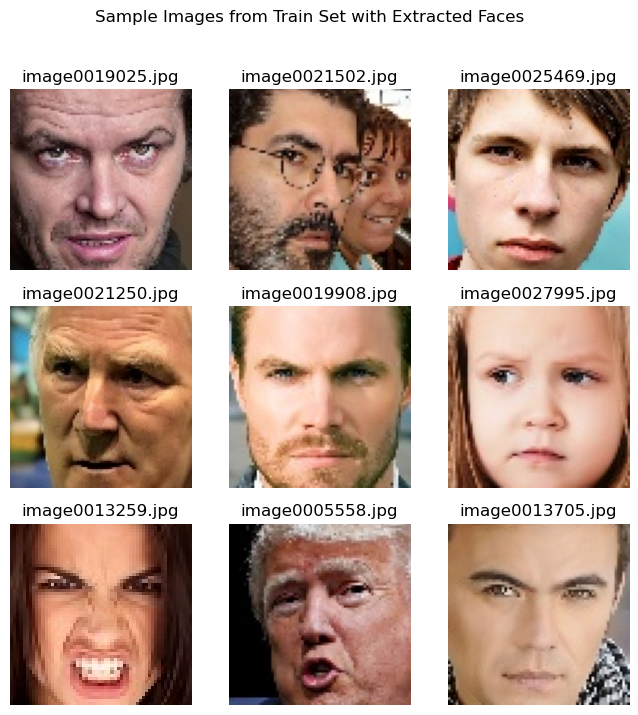

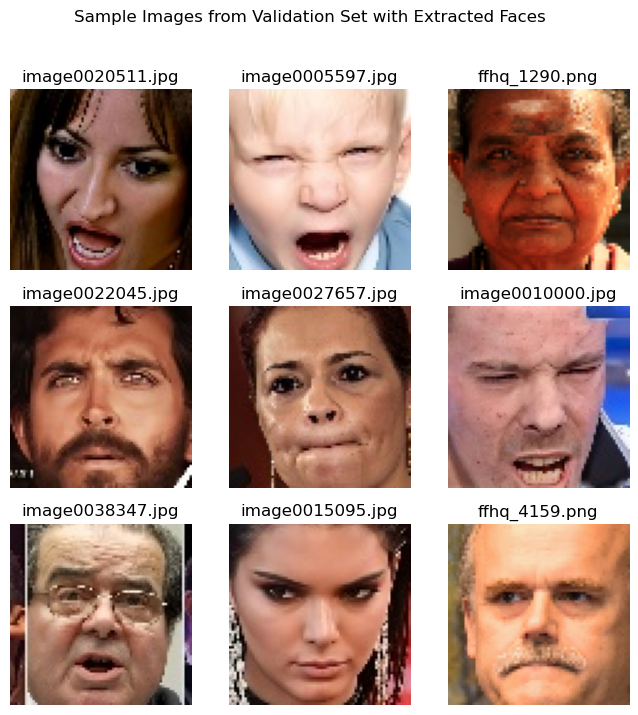

In [11]:
# Display train set images with extracted faces
display_image_with_face(train_image_dir, train_images)
plt.suptitle('Sample Images from Train Set with Extracted Faces')
plt.show()

# Display validation set images with extracted faces
display_image_with_face(valid_image_dir, valid_images)
plt.suptitle('Sample Images from Validation Set with Extracted Faces')
plt.show()

### Data augmentation

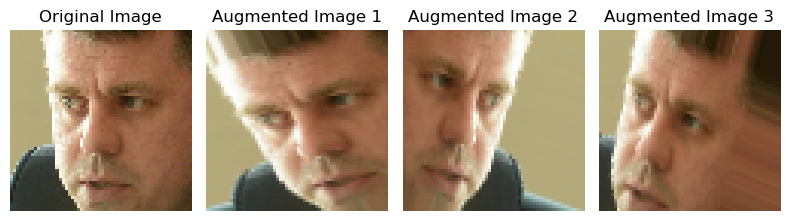

In [12]:
# Data augmentation parameters for training sets
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and test sets (usually no augmentation is necessary for these data sets)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess a sample image for demonstration
sample_img_path = os.path.join(train_image_dir, train_images[0])
sample_img = extract_face(sample_img_path)
sample_img = cv.cvtColor(sample_img[0], cv.COLOR_BGR2RGB)
sample_img = sample_img.reshape((1,) + sample_img.shape) # Reshape to (1, height, width, channels)

# Display original and augmented images for comparison
plt.figure(figsize=(8, 8))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(sample_img[0])
plt.title('Original Image')
plt.axis('off')

# Augmented image
for i, augmented_img in enumerate(train_datagen.flow(sample_img, batch_size=1)):
    plt.subplot(1, 4, i + 2)
    plt.imshow(augmented_img[0])
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')
    
    # Lets Display three augmented images for demonstration
    if i == 2:
        break

plt.tight_layout()
plt.show()

### Image generators

In [13]:
# Define image directories, train, validation sets for image generators
train_image_dir = os.path.join(image_dataset_dir, "train")
valid_image_dir = os.path.join(image_dataset_dir, "valid")
test_image_dir = os.path.join(image_dataset_dir, "test")

In [14]:
# Create generator for training, validation, and test sets

image_size = (96, 96) # We maintain original sizes of images.
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True # Enable shuffle to make model more robust
)

validation_generator = val_test_datagen.flow_from_directory(
    valid_image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Disable shuffle to maintain order of labels
)


Found 17101 images belonging to 8 classes.
Found 5406 images belonging to 8 classes.


## Step 5: CNN model building:

Our model architecture for this task will comprise of **3 convolutional layers** with **2 fully connected layers**. <br>
1. The first convolutional layer comprises of **32 filters** with a **kernel of 3x3** and **1 stride** with an input shape of **96 x 96 x 3** and activation function as **ReLu**.
2. The second convolutional layer comprises of **64 filters** with a **kernel of 3x3** and activation function as **ReLu**
3. The third convolutional layer comprises of **128 filters** with a **kernel of 3x3** and activation function as **ReLu**
4. The first fully connected layer comprise of **256 hidden neurons** and activation function as **ReLu**
5. The second fully connected layer comprise of **8 output neurons** and activation function as **softmax**

In [ ]:
# Image Shape
image_shape = (96, 96, 3)

# create sequential module
cnn_model = Sequential()

cnn_model.add(InputLayer(input_shape=image_shape))

# First Convolution layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convulation layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convulation layer
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the results to feed to DNN
cnn_model.add(Flatten())

# First Fully connected layer with 256 neuron hidden layers
cnn_model.add(Dense(units=256, activation='relu'))

# Add 50% dropout to help reduce overfitting
cnn_model.add(Dropout(0.5))

# Second Fully connected layer with 8 output neuron
cnn_model.add(Dense(units=8, activation='softmax'))  # 8 classes